## 2018 Housing Survey of West Bloomington

The City of Bloomington receives federal pass-through dollars in the form of Community Development Block Grant funds. These funds are managed by the city and are granted to individuals, non-profit organizations and businesses within slum and blighted neighborhoods for a variety of property improvements and program support.

To qualify for CDBG money, the City must demonstrate that it has neighborhoods in need of revitalization. This is done by completing a Building & Conditions Report every 10 years, to establish and continue funding.

The first Building and Conditions (B&C) report was completed in 2008. During the summer of 2018, an IWU intern named Benjamin Nielsen worked with the IWU Action Research Center and the City of Bloomington to complete the second B&C survey of West Bloomington. His data collection secured continued funding for CDBG funds. This data is publically available and can be analyzed by anyone interested in generating insights from the data. 





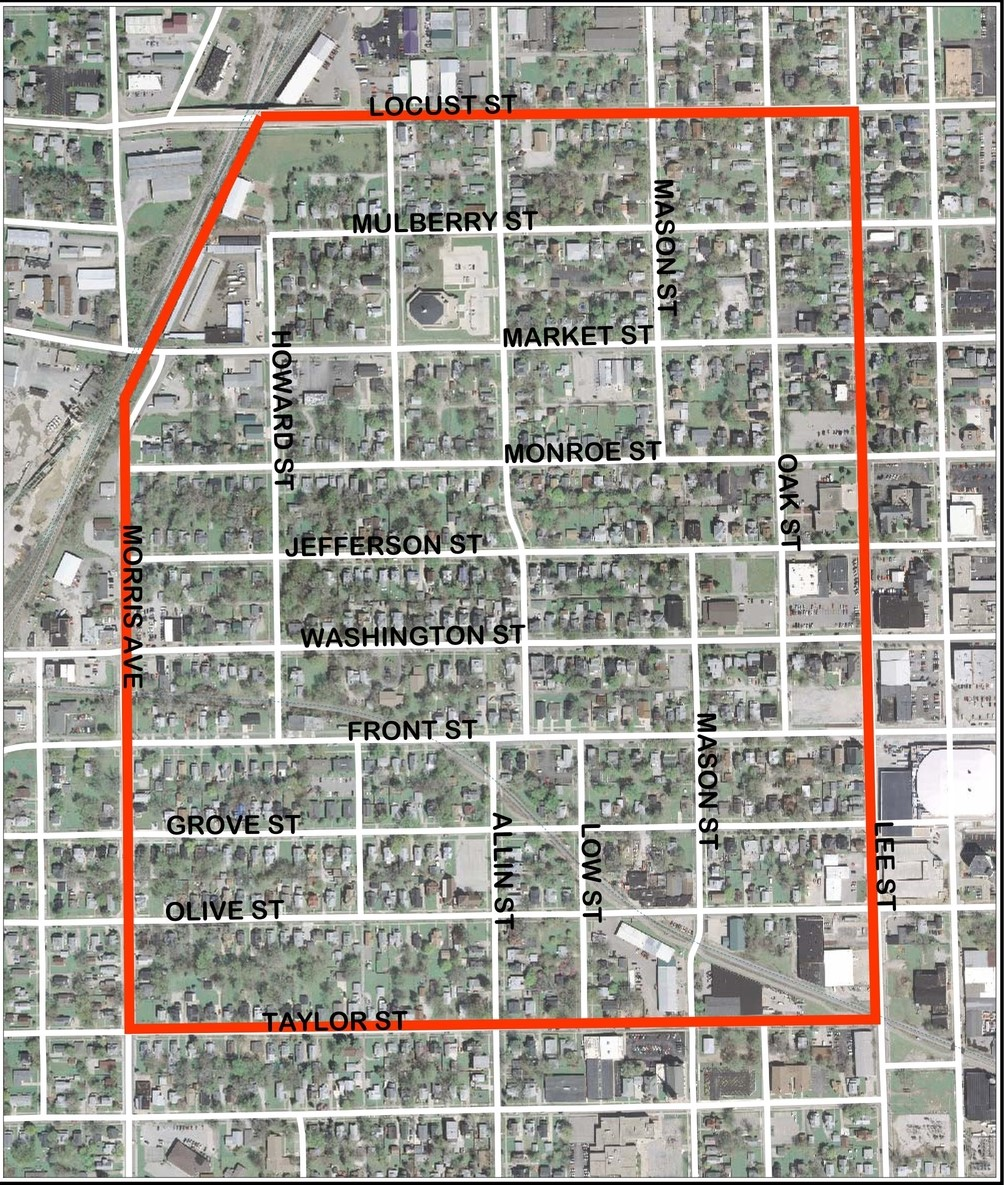

In [59]:
from IPython.display import Image
Image("WestBloomington.jpg")

###Rating
## **1** - Excellent, **2** - Good, **3** - Fair, **4** - Poor 

#Research goals:

Use visualizations to identify which areas within West Bloomington have the most urgent need for revitalizatin. This could be achieved by a Choropleth map using Geopandas. For this, we would have to look how where each component of a property is rated the worst (poor or critical) so we can identify where we'd need to focus further research on if we want to revitalize roof, foundation or gutter, for example. *Since I have the addresses of most properties, I could potentially make the maps by finding out latitudes and longitudes of all the properties.* Other goals of my project are to see if


*   the north side properties are doing better than south or vice versa
*   is there a trend between propeties located east to west or north to south
*   is there any one part of the property that has the lowest/same score across the entire street
*   is there any relation between the rating of two components




#Imports

In [1]:
# Code by: Eva Nautiyal
# Class: Applied Data Analysis
# Fall 2019

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 120

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Creating Dataframe

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1SEI9P_qNzOOQj2uwO6wEsTLjp_TIHlpg0kpqWHeRNfo/edit#gid=924858711'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

# check dataframe
df.head()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3,3.0,3,3,3,2,3,2.0,3,3,2.0,408 N LEE,NaN
1,12806,1,2,4,3.0,2,2,3,3,2,2.0,2,2,1.0,508 N LEE,NaN
2,12807,1,2,3,2.0,3,2,2,2,0,2.0,2,2,2.0,510 N LEE,NaN
3,12808,1,2,2,NaN,2,2,2,2,2,2.0,2,2,0.0,611 N LEE,NaN
4,13205,1,3,2,0.0,2,2,2,2,3,2.0,2,0,2.0,412 N LEE,NaN


## Verifying Data
There are several missing values in our data because the rated object either does not exist, e.g. gutter or there was an error when entering the hand-written data into digital copies. The properties that do not have a gutter have no score. This is subsequently changed to 4 because no gutter means a bad gutter *which is critical*.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 16 columns):
c                       516 non-null int64
Type_                   516 non-null int64
PublicSidewalk          516 non-null int64
Roof                    516 non-null int64
Chimney                 514 non-null float64
Gutter                  516 non-null int64
Siding                  516 non-null int64
Windows                 516 non-null int64
Screens                 516 non-null int64
EntryStairs             516 non-null int64
Porch                   515 non-null float64
Foundation              516 non-null int64
Sidewalk                516 non-null int64
Driveway                506 non-null float64
Address                 512 non-null object
AccessStructureType2    78 non-null object
dtypes: float64(3), int64(11), object(2)
memory usage: 64.6+ KB


In [4]:
#checking how many missing values exist
df.isna().sum()

c                         0
Type_                     0
PublicSidewalk            0
Roof                      0
Chimney                   2
Gutter                    0
Siding                    0
Windows                   0
Screens                   0
EntryStairs               0
Porch                     1
Foundation                0
Sidewalk                  0
Driveway                 10
Address                   4
AccessStructureType2    438
dtype: int64

#NaN policy and Data Entry Errors

This data was taken on paper and the form originally consisted of checkboxes labelled from 1 to 4 for each propetry to be rated. It was done during the summer of 2018 by a group of Illinois Wesleyan students and staff member. The data was then handed over to the City of Bloomington, where a "middleman" entered this data digitally. The excel files were then made available for analysis. Somewhere in this data entry process, people in charge of recording the data decided to enter either 0 or simply made some data entry errors.

Note that when NaNs are dropped for subsequent analysis, we lose a huge amount of data.

In [5]:
#replacing 0 with Nan for consistency
df.replace(0, np.nan, inplace=True)
df

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,76010,1,2,2.0,NaN,2.0,2,2,3.0,2.0,2.0,2.0,2.0,2.0,710 W. Locust St.,NaN
512,76011,1,2,2.0,2.0,2.0,2,2,2.0,2.0,2.0,2.0,NaN,2.0,810 W. Locust St.,Shed
513,76013,1,2,3.0,3.0,2.0,2,2,2.0,3.0,2.0,2.0,NaN,4.0,808 W. Grove St.,NaN
514,76014,1,2,2.0,3.0,2.0,2,2,2.0,2.0,NaN,2.0,2.0,3.0,807 W. Olive St.,NaN


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c,516.0,44609.341085,19213.478611,12805.0,27211.75,44010.5,61613.25,76015.0
Type_,516.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
PublicSidewalk,516.0,2.085271,0.729740,1.0,2.00,2.0,2.00,4.0
Roof,511.0,2.428571,0.786083,1.0,2.00,2.0,3.00,4.0
Chimney,348.0,2.603448,0.742447,1.0,2.00,3.0,3.00,4.0
Gutter,503.0,2.522863,0.807691,1.0,2.00,2.0,3.00,4.0
Siding,516.0,2.428295,0.758572,1.0,2.00,2.0,3.00,4.0
Windows,516.0,2.447674,0.772824,1.0,2.00,2.0,3.00,4.0
Screens,479.0,2.576200,0.824531,1.0,2.00,2.0,3.00,4.0
EntryStairs,493.0,2.482759,0.817869,1.0,2.00,2.0,3.00,4.0


##Overall Structure Ranking
Overall structure ranking is used to measure the overall conditions of houses in Bloomington. According to the 2008 Buildings and Conditions Report, the weight is distributed amongst all components in the following way.

The building component rankings were weighted for the overall structure ranking
based on the components importance to the structural integrity of the building. The most important components, vital to structural integrity, included: foundation, roof, exterior walls, and windows; these components were weighted to contribute to 90% of the structures overall ranking. The weight of the components rankings are listed below in percentages:

1. Foundation: 30%

2. Roof: 30%

3. Siding: 20%

4. Windows: 10%

5. Porch: 2%

6. Porch Steps: 2%

7. Screens/Storms: 1%

8. Chimney Tower: 1%

9. Guttering: 1%

10. Accessory Structure: 1%

11. Garage: 1%

12. Sidewalk/Drive: 1%

Total: 100%

The overall ranking was calculated (see equation below) by multiplying the components rank by its assigned weight. Each weighted ranking was totaled and divided by the total of potential weights.

Because we don't have an exterior wall rating for 2018 data, we will distribute the weight of that component.  Option: make Foundation and Roof 40% each 


##Add variables with weighted scores to the table 

In [7]:
#creating weighted variables and use fillna function to fill the missing values with mean in each column
weightedlist = ['FoundationW', 'RoofW', 'WindowsW', 'SidingW', 'PorchW', 'ChimneyW', 'GutterW', 'EntryStairsW', 'SidewalkW', 'ScreensW']

df['FoundationW'] = df['Foundation'].fillna(df['Foundation'].mean()) * 0.30
df['RoofW'] = df['Roof'].fillna(df['Roof'].mean())*0.30
df['SidingW'] = df['Siding'].fillna(df['Siding'].mean())*0.20
df['WindowsW'] = df['Windows'].fillna(df['Windows'].mean())*0.10
df['PorchW'] = df['Porch'].fillna(df['Porch'].mean())*0.02
df['EntryStairsW'] = df['EntryStairs'].fillna(df['EntryStairs'].mean())*0.02
df['ScreensW'] = df['Screens'].fillna(df['Screens'].mean())*0.01
df['ChimneyW'] = df['Chimney'].fillna(df['Chimney'].mean())*0.01
df['GutterW'] = df['Gutter'].fillna(df['Gutter'].mean())*0.01
df['SidewalkW'] = df['Sidewalk'].fillna(df['Sidewalk'].mean())*0.01

df[weightedlist].isna().sum()

FoundationW     0
RoofW           0
WindowsW        0
SidingW         0
PorchW          0
ChimneyW        0
GutterW         0
EntryStairsW    0
SidewalkW       0
ScreensW        0
dtype: int64

####SumW is another column which is calculated out of 4. Note that the properties were rated best to worst as 1 to 4.


In [8]:
df['sumW'] = df[weightedlist].sum(axis=1)


df['sumW'].describe()

count    516.000000
mean       2.416009
std        0.578291
min        0.996034
25%        1.981117
50%        2.310000
75%        2.767864
max        3.920000
Name: sumW, dtype: float64

##Calculating the percentage of properties rated in each category

In [9]:
#make dataframe
percent = df[['PublicSidewalk', 'Roof', 'Chimney', 'Gutter', 'Siding', 'Windows', 'Screens', 'EntryStairs', 'Porch', 'Foundation', 'Sidewalk', 'Driveway']]

#pivot table to get percentages
for p in percent: 
    df_pvt = (df[p].value_counts(normalize=True))
    print(df_pvt)



2    0.629845
1    0.170543
3    0.143411
4    0.056202
Name: PublicSidewalk, dtype: float64
2.0    0.534247
3.0    0.279843
4.0    0.111546
1.0    0.074364
Name: Roof, dtype: float64
2.0    0.456897
3.0    0.387931
4.0    0.123563
1.0    0.031609
Name: Chimney, dtype: float64
2.0    0.522863
3.0    0.276342
4.0    0.149105
1.0    0.051690
Name: Gutter, dtype: float64
2    0.550388
3    0.284884
4    0.102713
1    0.062016
Name: Siding, dtype: float64
2    0.558140
3    0.267442
4    0.118217
1    0.056202
Name: Windows, dtype: float64
2.0    0.453027
3.0    0.329854
4.0    0.154489
1.0    0.062630
Name: Screens, dtype: float64
2.0    0.555781
3.0    0.235294
4.0    0.152130
1.0    0.056795
Name: EntryStairs, dtype: float64
2.0    0.441261
3.0    0.355301
4.0    0.134670
1.0    0.068768
Name: Porch, dtype: float64
2.0    0.519455
3.0    0.350195
4.0    0.097276
1.0    0.033074
Name: Foundation, dtype: float64
2.0    0.492569
3.0    0.252654
4.0    0.191083
1.0    0.063694
Name: Sidewal

##**Poor Properties (including critical)**



In [10]:
poor = df['sumW'] > 3
poor.value_counts()

False    433
True      83
Name: sumW, dtype: int64

In [11]:
poor = df['sumW'] > 3
df[poor]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN,0.9,1.200000,0.6,0.4,0.051117,0.049655,0.025762,0.026034,0.030000,0.040000,3.322569
37,18412,1,2,4.0,3.0,4.0,4,2,2.0,4.0,4.0,3.0,4.0,3.0,519 W GROVE,NaN,0.9,1.200000,0.8,0.2,0.080000,0.080000,0.020000,0.030000,0.040000,0.040000,3.390000
44,18807,1,2,NaN,3.0,NaN,3,3,3.0,4.0,4.0,4.0,3.0,4.0,518 W GROVE,NaN,1.2,0.728571,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.025229,0.030000,3.103800
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.200000,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.040000,0.025711,3.865711
78,21209,1,2,4.0,3.0,3.0,3,3,4.0,2.0,3.0,3.0,2.0,3.0,605 W GROVE,Shed,0.9,1.200000,0.6,0.3,0.060000,0.040000,0.040000,0.030000,0.030000,0.020000,3.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,67611,1,2,4.0,NaN,4.0,4,3,3.0,2.0,NaN,3.0,4.0,NaN,915 W Grove St,NaN,0.9,1.200000,0.8,0.3,0.051117,0.040000,0.030000,0.026034,0.040000,0.040000,3.427152
445,69610,1,2,3.0,2.0,3.0,3,3,3.0,4.0,NaN,4.0,2.0,4.0,925 W Grove St,NaN,1.2,0.900000,0.6,0.3,0.051117,0.080000,0.030000,0.020000,0.030000,0.020000,3.231117
458,70815,1,3,3.0,3.0,4.0,4,3,4.0,3.0,NaN,4.0,3.0,2.0,615 W. Mulberry St.,NaN,1.2,0.900000,0.8,0.3,0.051117,0.060000,0.040000,0.030000,0.040000,0.030000,3.451117
466,71209,1,4,4.0,3.0,4.0,3,2,2.0,2.0,2.0,3.0,4.0,4.0,506 N. Mason st.,NaN,0.9,1.200000,0.6,0.2,0.040000,0.040000,0.020000,0.030000,0.040000,0.040000,3.110000


##**Critical Properties**

Critical properties with worst weighted sum.


In [49]:
critical = df['sumW'] > 3.5
df[critical]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.2,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.04,0.025711,3.865711
100,25211,1,2,3.0,NaN,3.0,4,4,4.0,4.0,NaN,4.0,NaN,4.0,301 S Low,NaN,1.2,0.9,0.8,0.4,0.051117,0.080000,0.040000,0.026034,0.03,0.025711,3.552863
104,25610,1,2,4.0,NaN,4.0,3,4,NaN,4.0,4.0,4.0,NaN,NaN,302 S Allin,NaN,1.2,1.2,0.6,0.4,0.080000,0.080000,0.025762,0.026034,0.04,0.025711,3.677508
115,26009,1,4,4.0,NaN,4.0,4,4,4.0,4.0,4.0,4.0,4.0,4.0,306 S Low,NaN,1.2,1.2,0.8,0.4,0.080000,0.080000,0.040000,0.026034,0.04,0.040000,3.906034
116,26010,1,3,4.0,3.0,4.0,3,3,3.0,4.0,4.0,4.0,4.0,4.0,814 W Front,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.04,0.040000,3.600000
133,28008,1,1,4.0,3.0,4.0,3,4,4.0,3.0,NaN,4.0,2.0,NaN,901 w Jefferson,NaN,1.2,1.2,0.6,0.4,0.051117,0.060000,0.040000,0.030000,0.04,0.020000,3.641117
137,28409,1,2,3.0,4.0,4.0,4,4,4.0,4.0,4.0,4.0,2.0,2.0,304 N Allin,NaN,1.2,0.9,0.8,0.4,0.080000,0.080000,0.040000,0.040000,0.04,0.020000,3.600000
141,29209,1,2,4.0,4.0,4.0,3,3,4.0,4.0,4.0,4.0,3.0,NaN,706 W Jefferson,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.040000,0.040000,0.04,0.030000,3.610000
186,33610,1,2,4.0,4.0,3.0,4,4,4.0,2.0,2.0,4.0,2.0,NaN,708 W Jefferson,NaN,1.2,1.2,0.8,0.4,0.040000,0.040000,0.040000,0.040000,0.03,0.020000,3.810000
187,33611,1,2,4.0,3.0,4.0,4,4,3.0,2.0,3.0,3.0,2.0,3.0,605 W Jefferson,NaN,0.9,1.2,0.8,0.4,0.060000,0.040000,0.030000,0.030000,0.04,0.020000,3.520000


##Separating data into new dataframes based on street address

In [0]:
streetlist = ['mul', 'lee', 'monroe', 'grove', 'washington', 'allin', 'low', 'taylor', 'olive', 'jefferson', 'oak', 'front', 'howard', 'catherine', 'market', 'mason', 'locust']

mulberry = df[df['Address'].str.contains('Mulberry', na=False, case=False).dropna()]
lee = df[df['Address'].str.contains('LEE', na=False, case=False).dropna()]
monroe = df[df['Address'].str.contains('Monroe', na=False, case=False).dropna()]
grove = df[df['Address'].str.contains('GROVE', na=False, case=False).dropna()]
washington = df[df['Address'].str.contains('Washington', na=False, case=False).dropna()]
allin = df[df['Address'].str.contains('Allin', na=False, case=False).dropna()]
low = df[df['Address'].str.contains('Low', na=False, case=False).dropna()]
taylor = df[df['Address'].str.contains('Taylor', na=False, case=False).dropna()]
olive = df[df['Address'].str.contains('Olive', na=False, case=False).dropna()]
jefferson = df[df['Address'].str.contains('Jefferson', na=False, case=False).dropna()]
oak = df[df['Address'].str.contains('Oak', na=False, case=False).dropna()]
front = df[df['Address'].str.contains('Front', na=False, case=False).dropna()]
howard = df[df['Address'].str.contains('Howard', na=False, case=False).dropna()]
catherine = df[df['Address'].str.contains('Catherine', na=False, case=False).dropna()]
market = df[df['Address'].str.contains('Market', na=False, case=False).dropna()]
morris = df[df['Address'].str.contains('Morris', na=False, case=False).dropna()]
mason = df[df['Address'].str.contains('Mason', na=False, case=False).dropna()]
locust = df[df['Address'].str.contains('Locust', na=False, case=False).dropna()]

dfstreet = pd.DataFrame(streetlist)


In [0]:
lee = lee.assign(Address='lee')
mulberry = mulberry.assign(Address='mul')
monroe = monroe.assign(Address='monroe')
olive = olive.assign(Address='olive')
allin = allin.assign(Address='allin')
oak = oak.assign(Address='oak')
market = market.assign(Address='market')
morris = morris.assign(Address='morris')
mason = lee.assign(Address='mason')
jefferson = jefferson.assign(Address='jeff')
front = front.assign(Address='front')
catherine = lee.assign(Address='catherine')
locust = locust.assign(Address='locust')
taylor = taylor.assign(Address='taylor')
low = low.assign(Address='low')
washington = washington.assign(Address='washington')
howard = howard.assign(Address='howard')
grove = grove.assign(Address='grove')


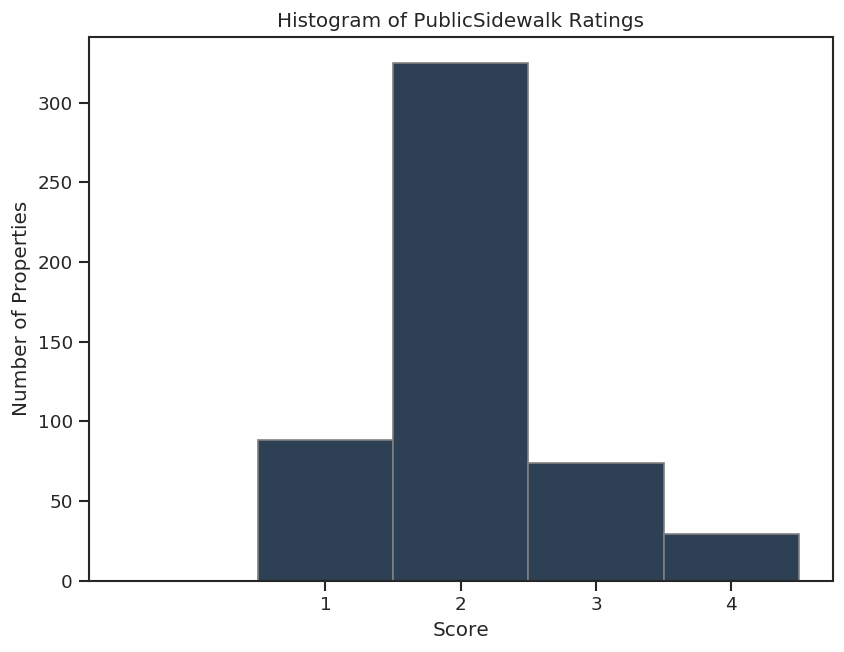

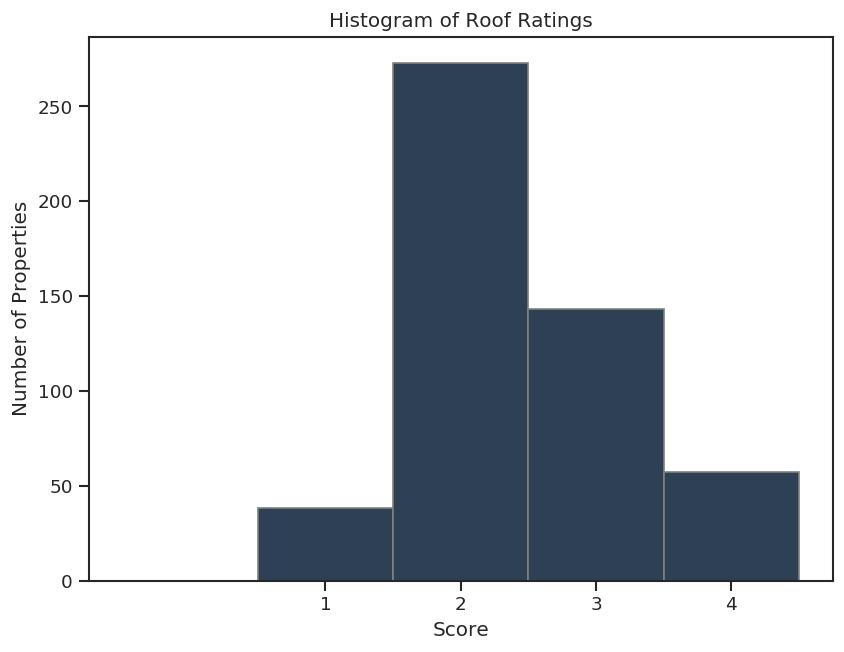

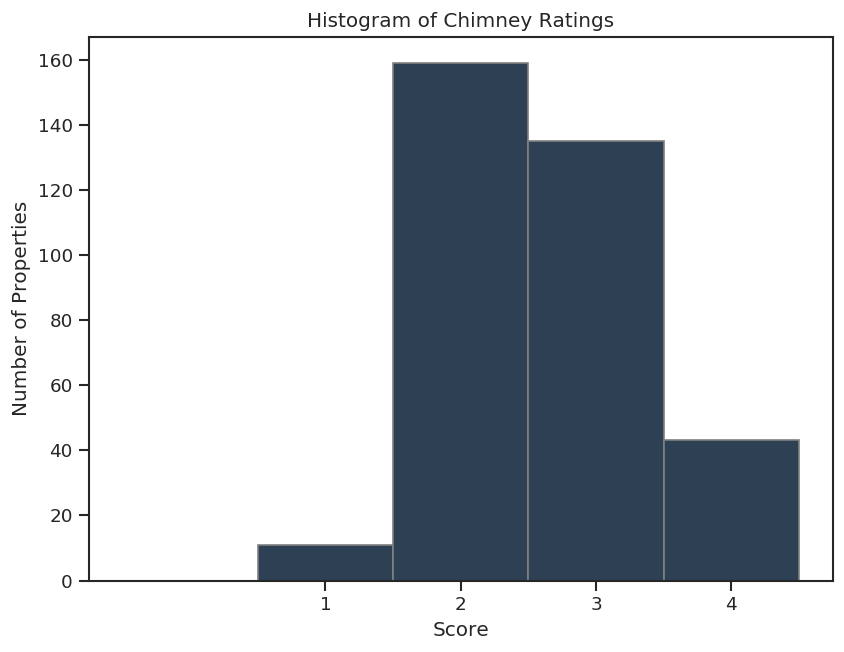

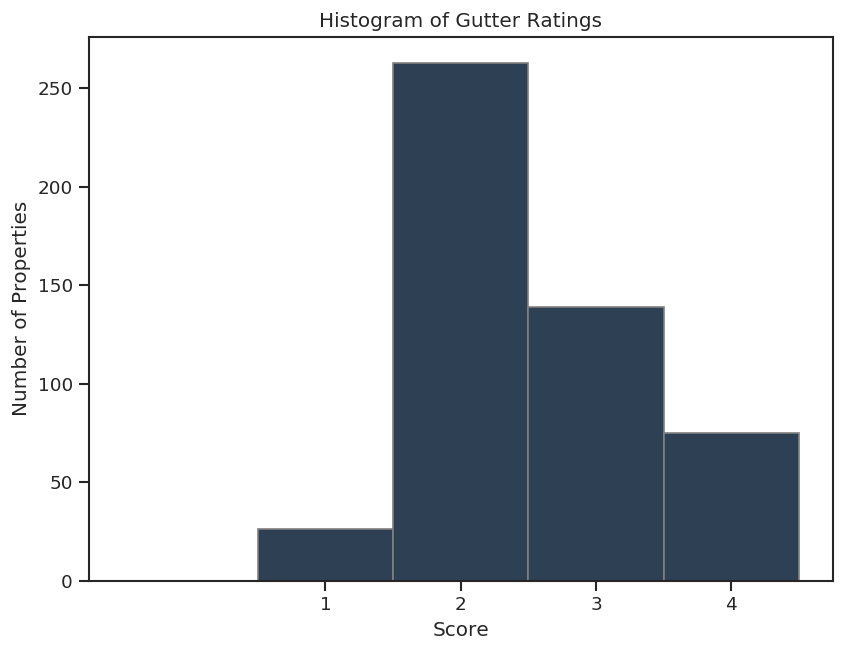

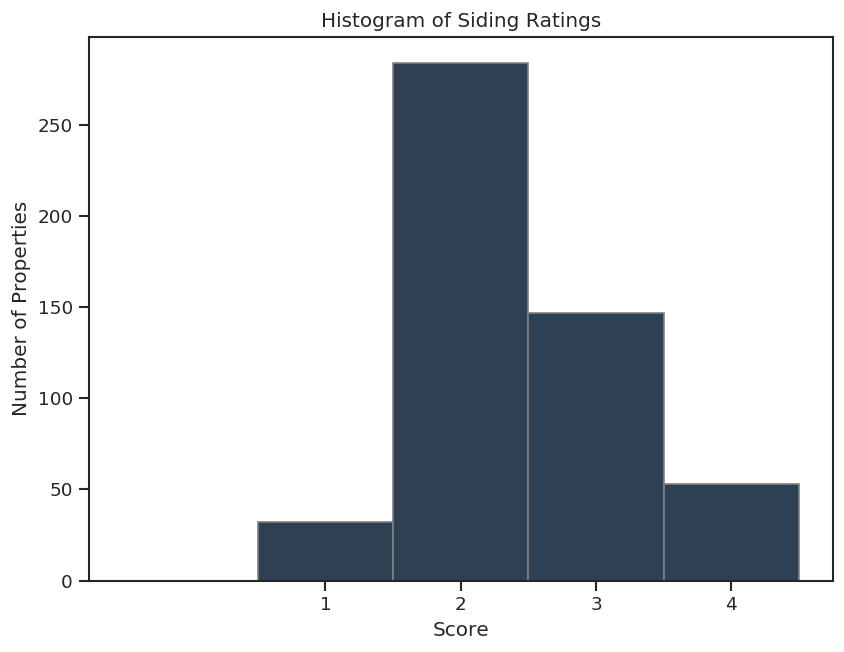

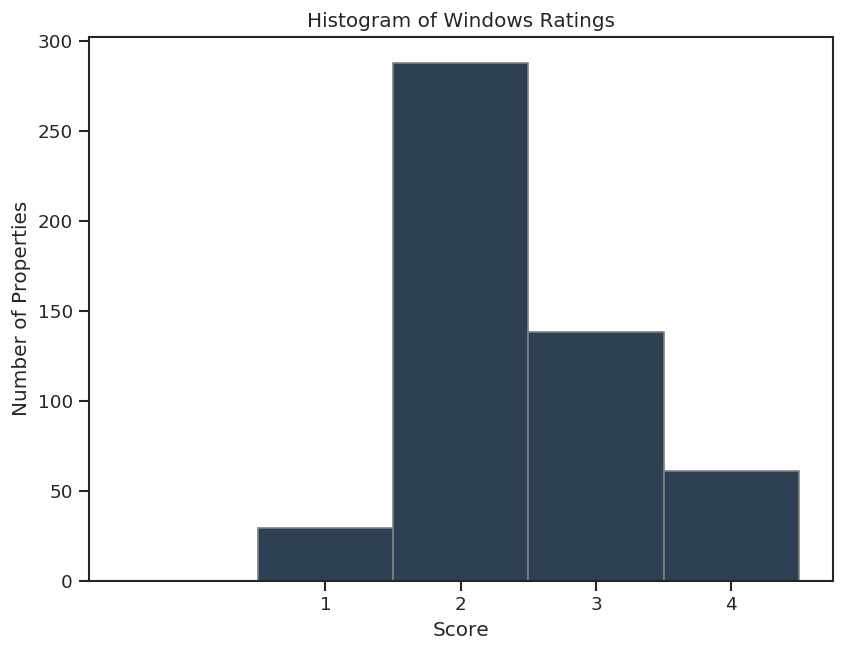

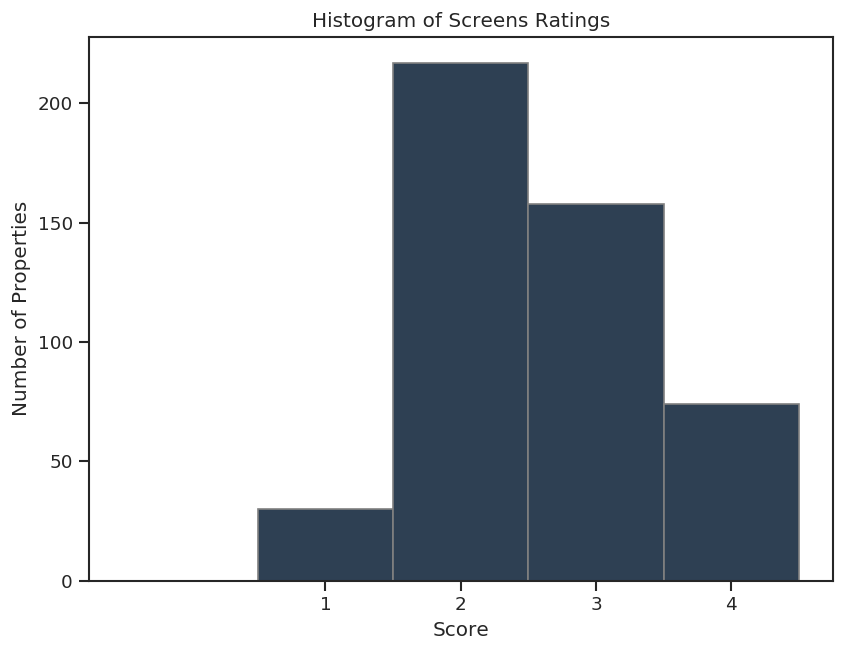

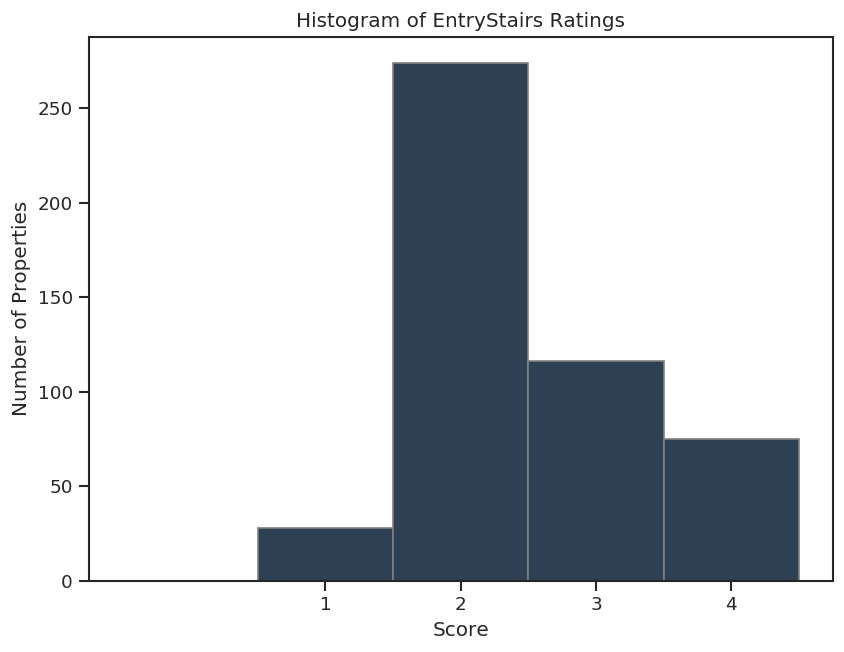

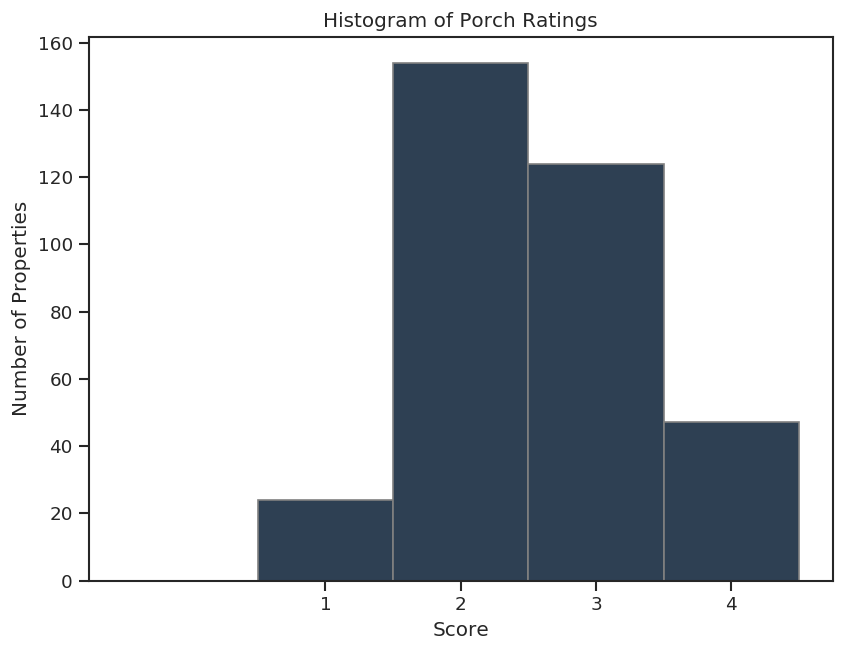

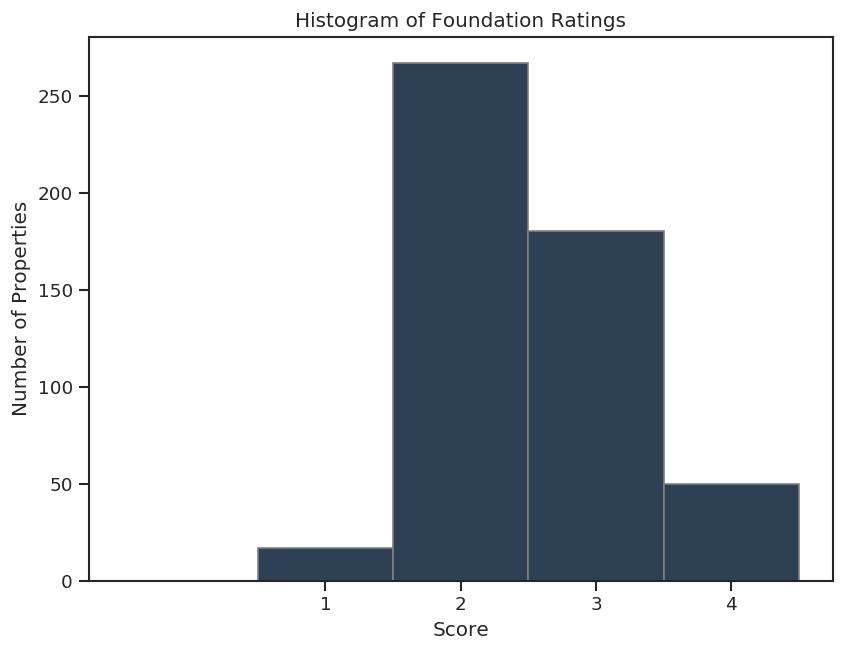

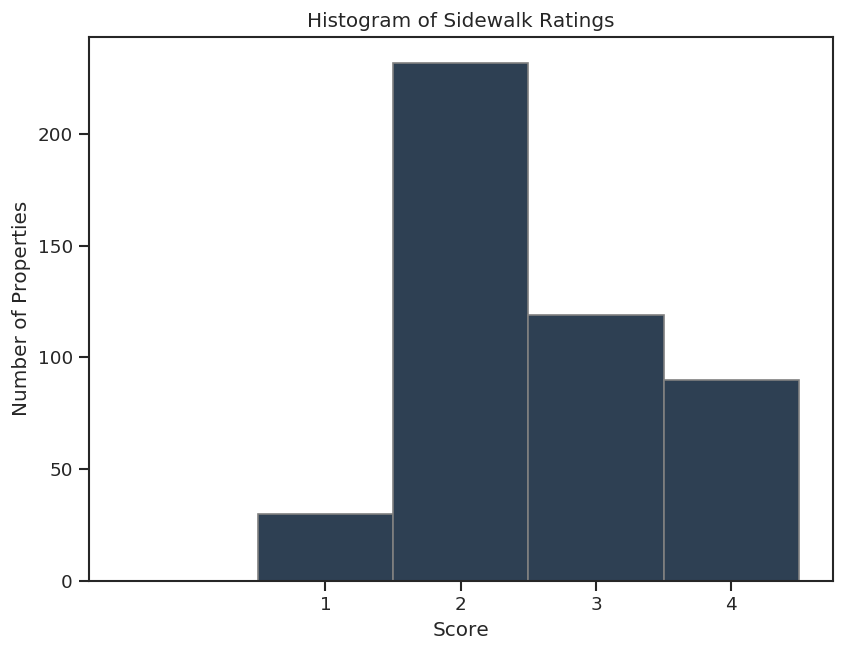

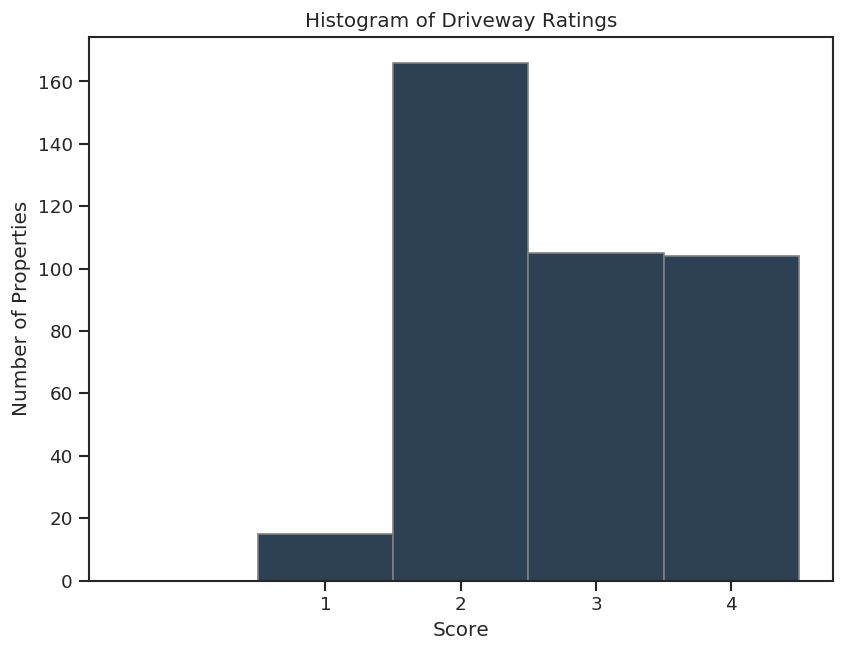

In [15]:
outcomes = df.columns[2:-13]
outcomes

for o in outcomes: 
  plt.hist(df[o], color='#2e4053', edgecolor='grey', bins=np.arange(6)-0.5)
  plt.xlabel("Score")
  plt.ylabel('Number of Properties')
  plt.xticks(range(1, 5))
  plt.title(f"Histogram of {o} Ratings")
  plt.show()



---


##Location of streets in West Bloomington

There are 7 streets from east to west: Morris, Howard, Allin, Low, Mason, Oak, Lee. The other 10 streets are from North to South: Locust, Mulberry, Market, Monroe, Jefferson, Washington, Front, Grove, Olive, Taylor.

#North vs South side of west Bloomington

###South side properties have lower number of exccellent ratings.

In [0]:
frameNorth = [locust, mulberry, market, monroe, jefferson]
resultNorth = pd.concat(frameNorth)

frameSouth = [washington, front, grove, olive, taylor]
resultSouth = pd.concat(frameSouth)

In [0]:
resultNS = [resultNorth, resultSouth]
finaldf = pd.concat(resultNS)

## Roof

*   Locust and Grove Street have no house with excellent roof.
*   Olive, Taylor, and Locust streets have no roof in poor condition.
*   Only Market street has a mix of excellent, good, fair, poor roofs. 



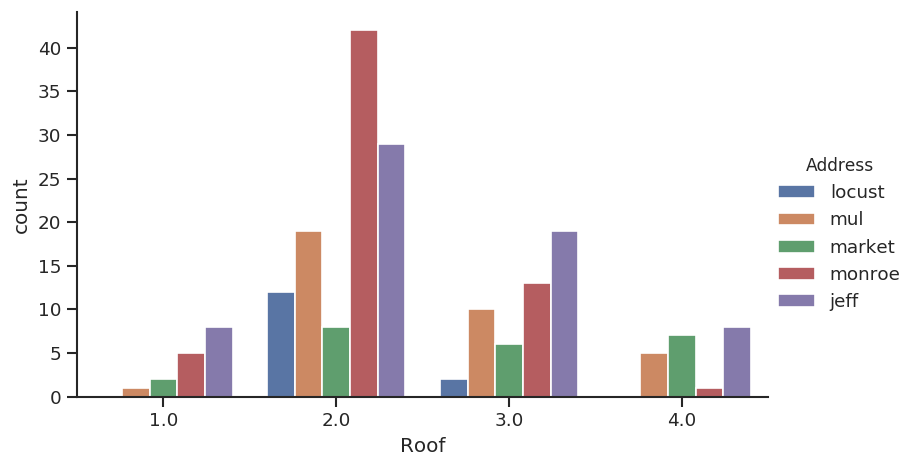

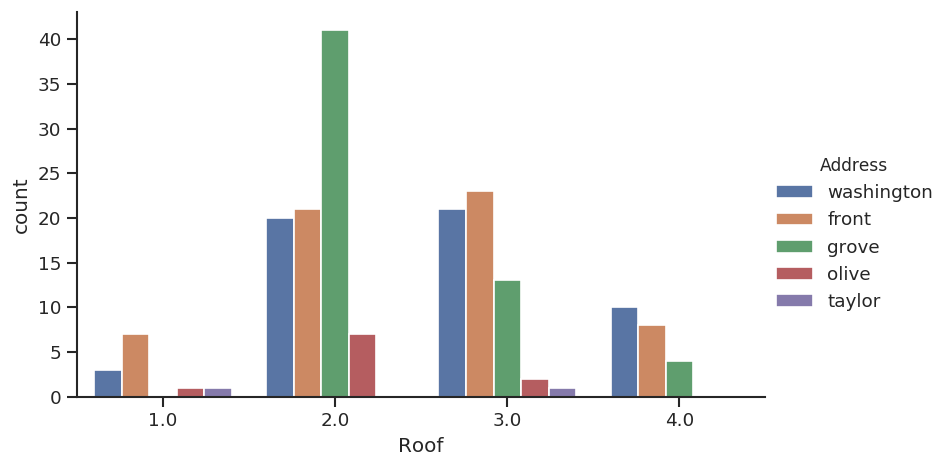

In [18]:

n = sns.catplot(x="Roof", hue="Address", 
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Roof", hue="Address", 
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


## Foundation

*   Monroe, Locust, Grove, Olive, and Taylor streets have no excellent foundation.
*   Locust, Olive, and Taylor streets also have no poor foundations. 
*   There are very few properties with excellent foundation. Note that the streets that do have excellent foundation also have poor foundations.



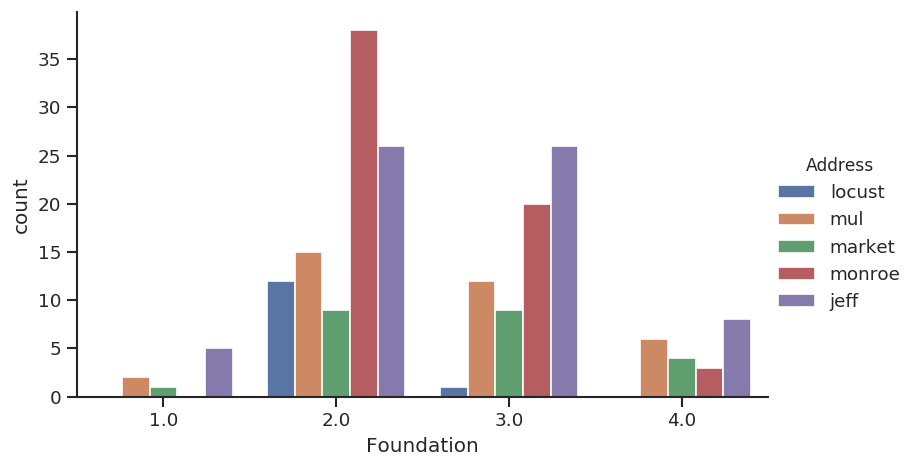

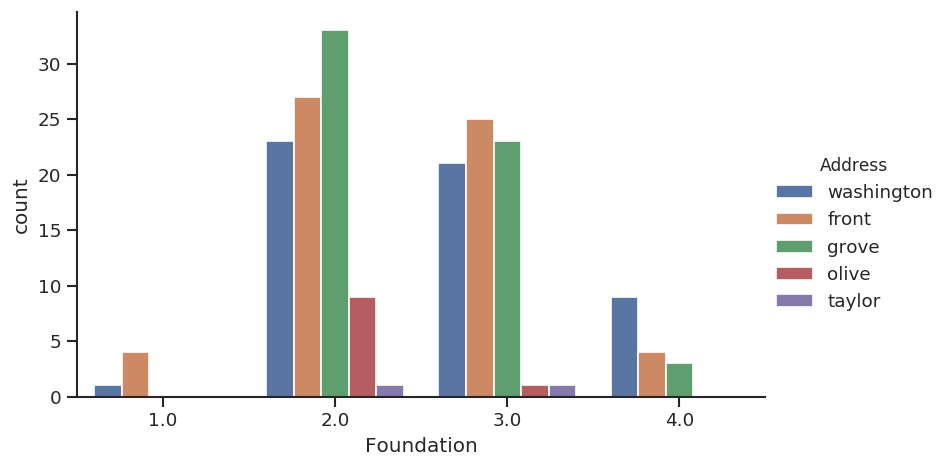

In [19]:
sns.catplot(x="Foundation", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Foundation", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


## Windows



*   Locust, Grove, Olive, and Washington have no excellent windows.
*   Locust, Olive, and Taylor have no poor windows. 
*   All northern streets that have excellent windows have more number of poor windows.
*   Windows on Locust and Olive are either good or fair. 






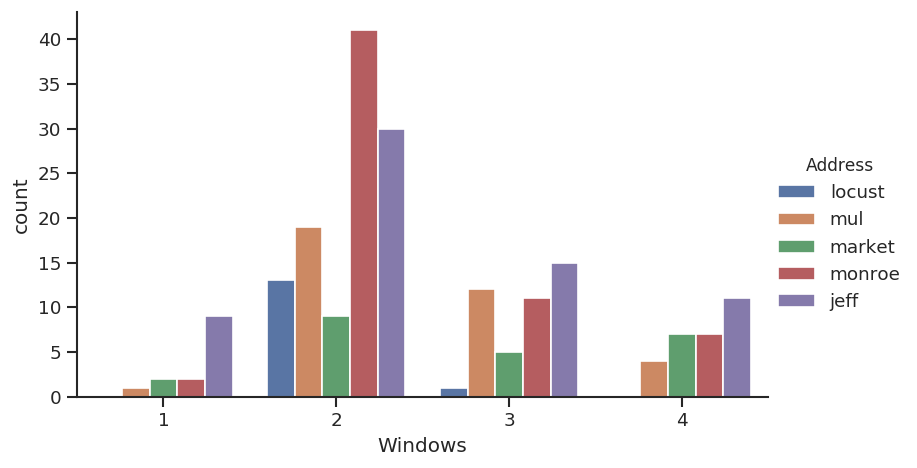

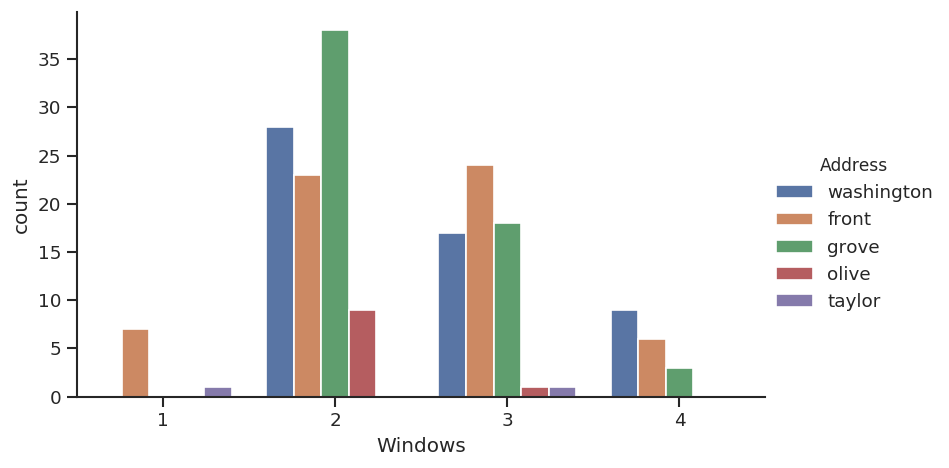

In [20]:
sns.catplot(x="Windows", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Windows", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


##Siding



*   Locust doesn't have any siding in excellent or poor condition. 
*   Grove and Olive have no excellent siding, but the former has some poor sidings.
*   All northern streets that have excellent sidings also have nearly or slightly more than the same number of poor sidings. 
*   Market street, again, has an even distribution in scores. 





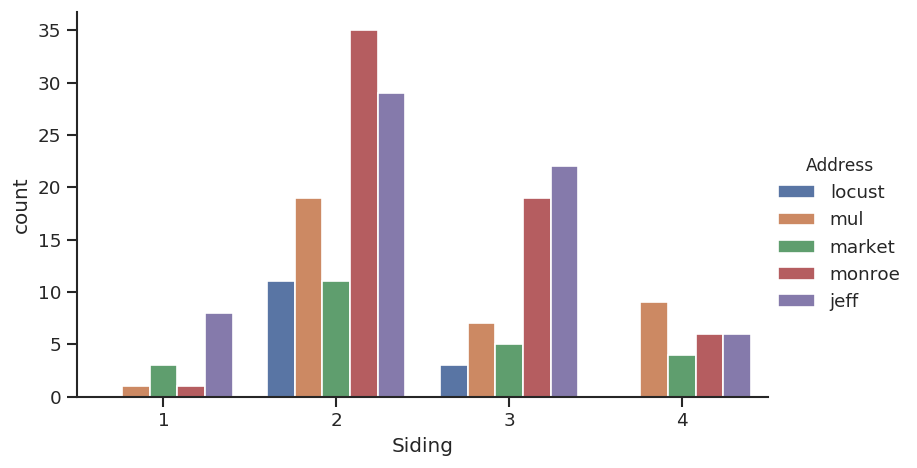

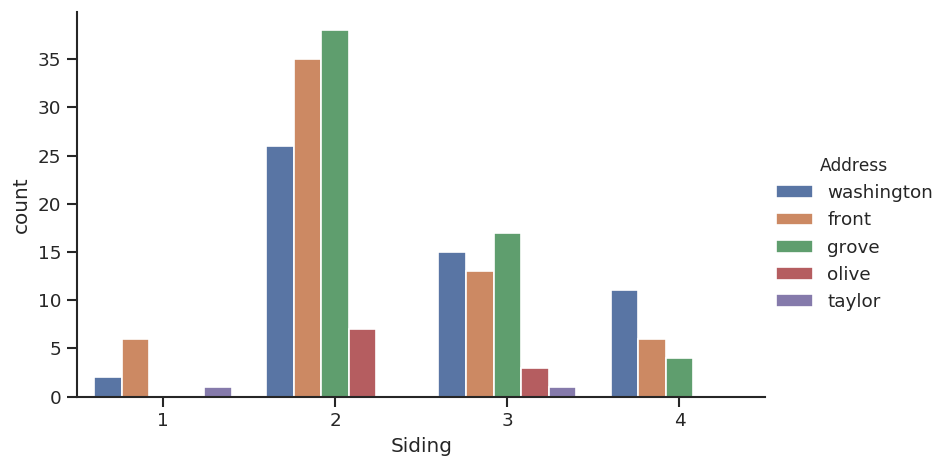

In [21]:
sns.catplot(x="Siding", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Siding", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Gutter



*   Mulberry, Market, Monroe, and Jefferson have gutters that have all the scores, with higher number of gutters rated good and fair than excellent and poor. 
*   Olive, Taylor and Washington have no excellent gutter. Olive and Taylor have no poor gutter, either. 

**Note here that very few properties on Olive and Taylor have a gutter, which essentially means that the highest number of gutters not existing are in the South side.**



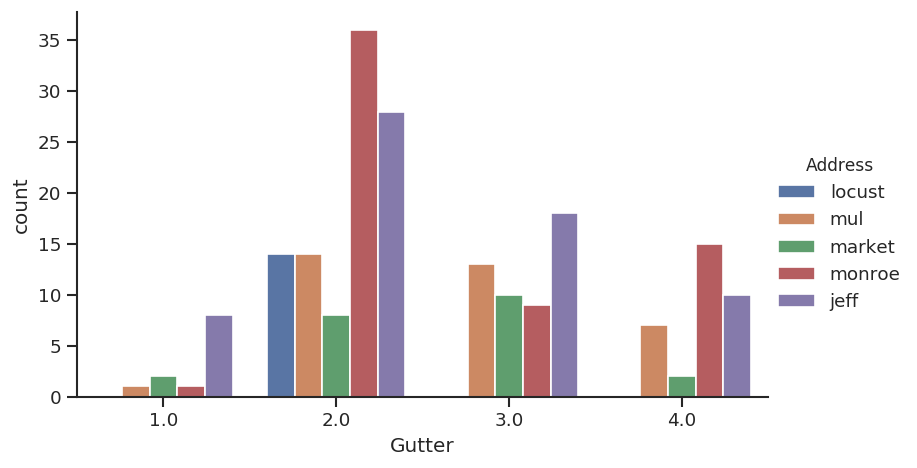

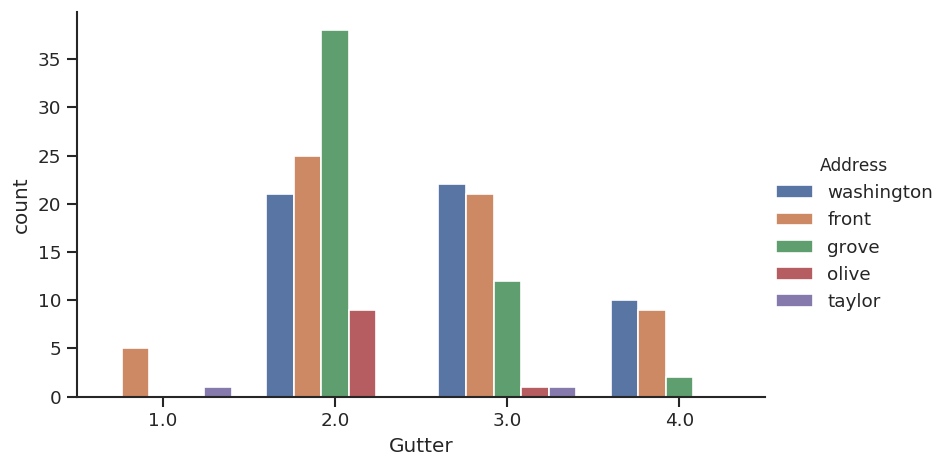

In [22]:
sns.catplot(x="Gutter", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Gutter", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Sidewalk



*   All the streets in North, except Locust, have at least 1 excellent sidewalk. Overall, the Northern streets have all kinds of sidewalks, with the least number being rated excellent.
*   South: Grove and Olive have no excellent sidewalk. Note again that olive street has very few properties represented in the chart. This indicates missing/incorrect data.



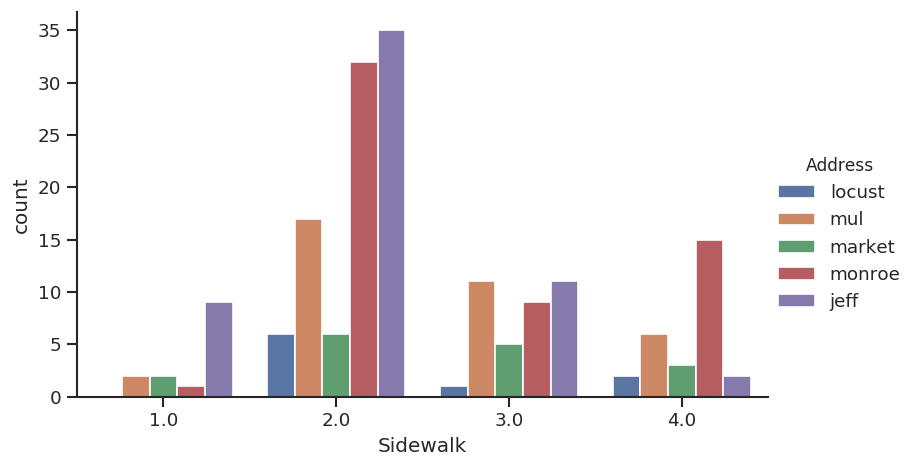

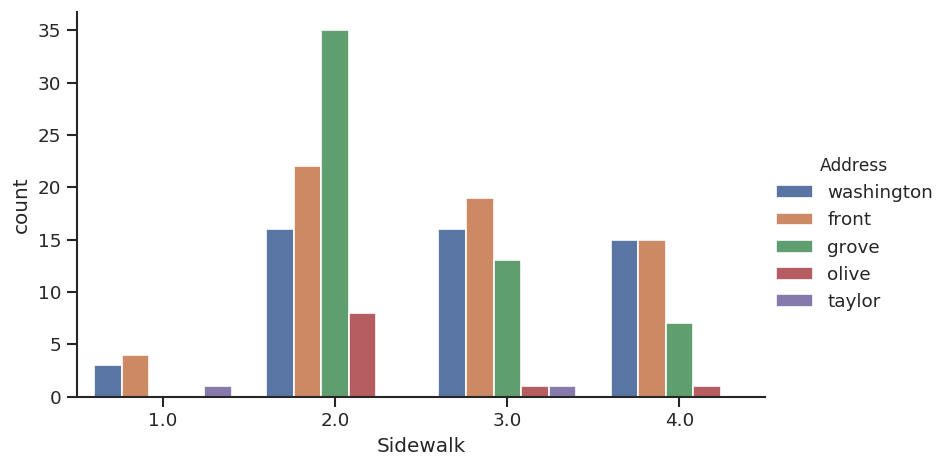

In [23]:
sns.catplot(x="Sidewalk", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Sidewalk", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Public Sidewalk



*   None of the northern public sidewalks are in a poor condition except for Market street. Most of the public sidewalks are rated good. 
*   Olive street again has very few public sidewalks. Taylor only has 1 public sidewalk rated good. 



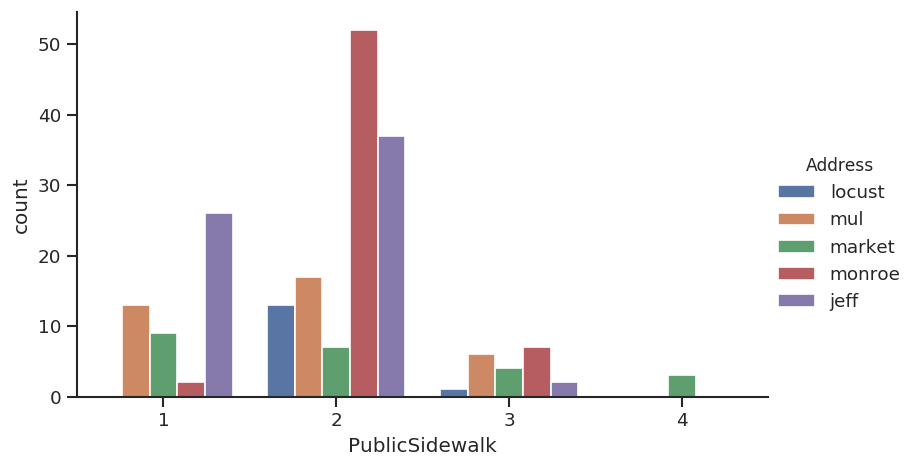

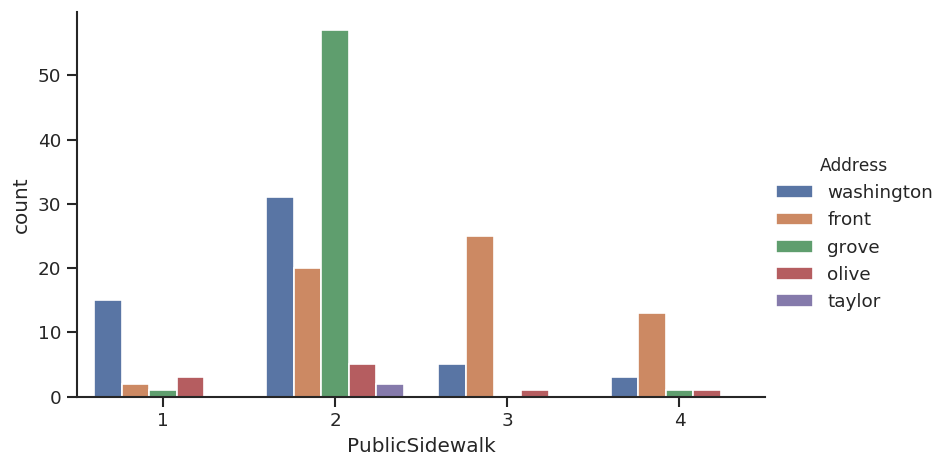

In [24]:
sns.catplot(x="PublicSidewalk", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="PublicSidewalk", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Driveway



*   Both the charts below show that there are only 3 streets which have any number of excellent driveways (monroe, jefferson and front). 
*   Unlike other components, driveway in South has gotten the most number of scores for 4, which is poor. 



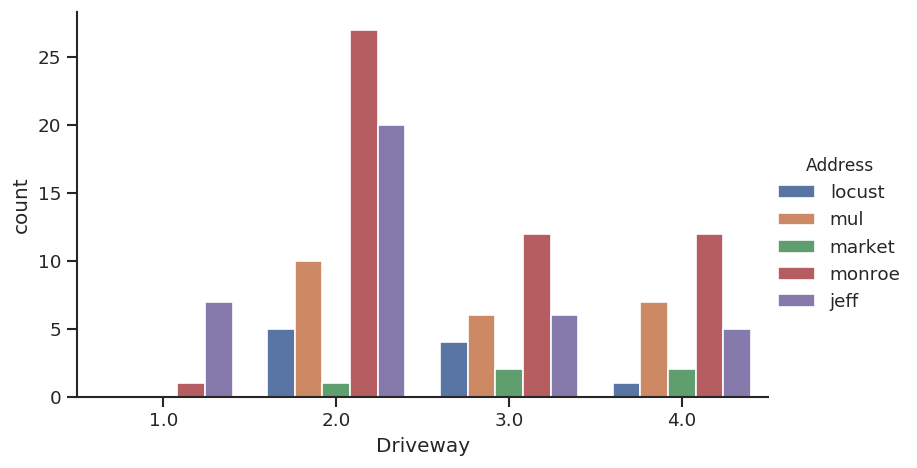

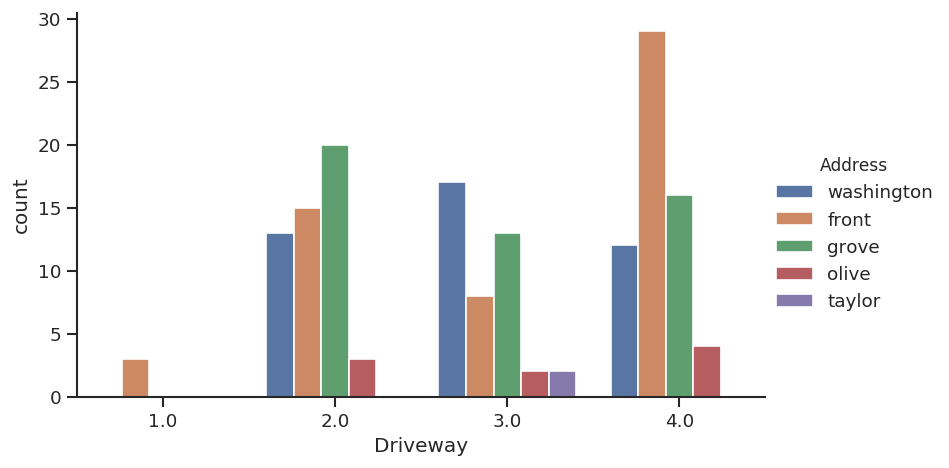

In [25]:
sns.catplot(x="Driveway", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Driveway", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Porch



*   Here we see more evenly distributed scores, except for locust, which only has 5 properties with a porch (rated good). 
*   Grove has no excellent porch. Olive and Taylor, again, have minimum data. 



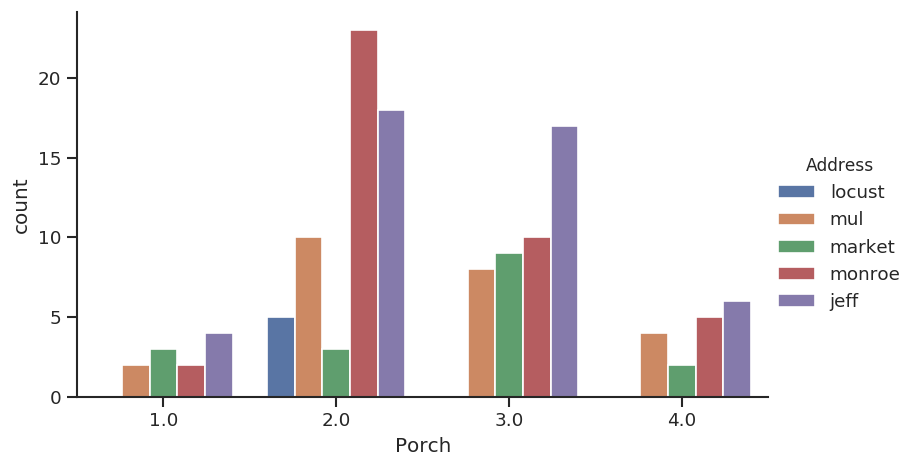

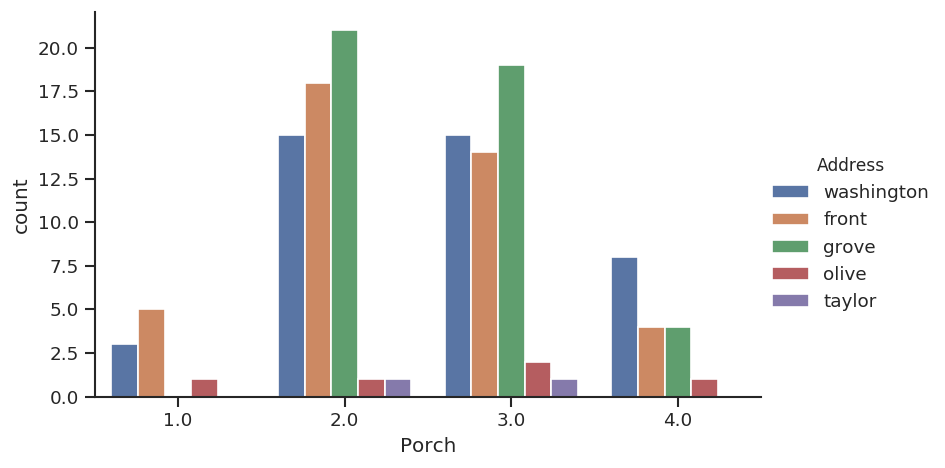

In [26]:
sns.catplot(x="Porch", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Porch", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Screens



*   Locust has no excellent screens.
*   Olive and Taylor on south side have no excellent screens. Front has more properties with fair screens than good. 



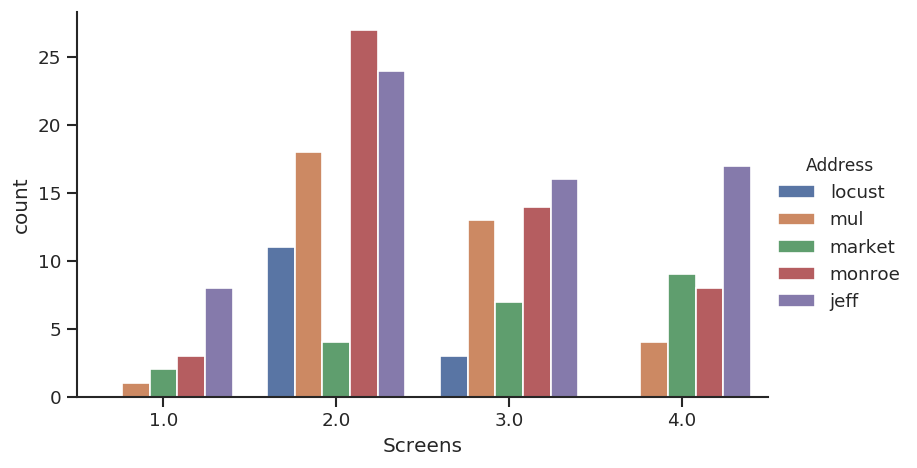

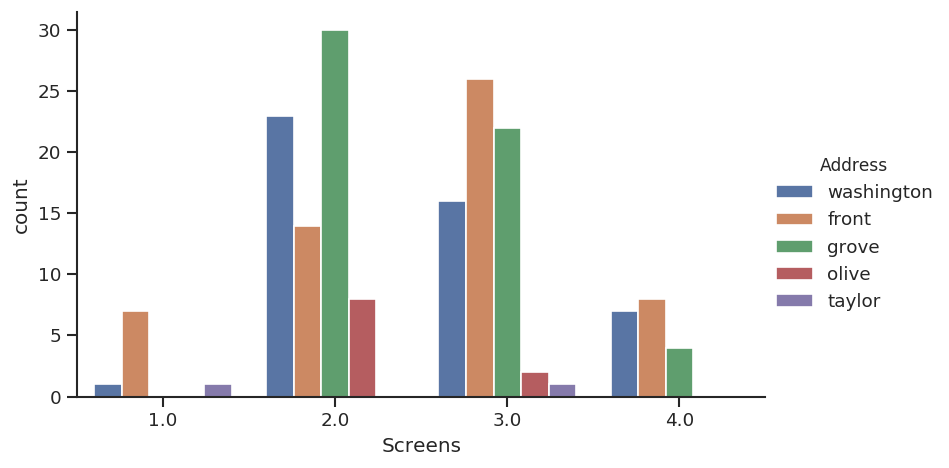

In [27]:
sns.catplot(x="Screens", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Screens", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Entry Stairs



*   Similar trend from above for the north side properties. 
*   Taylor barely has any data (only 2 properties are represented).



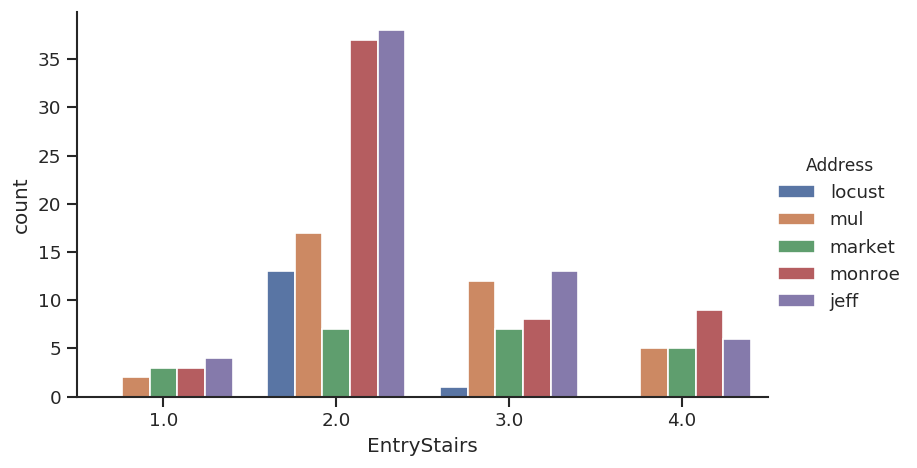

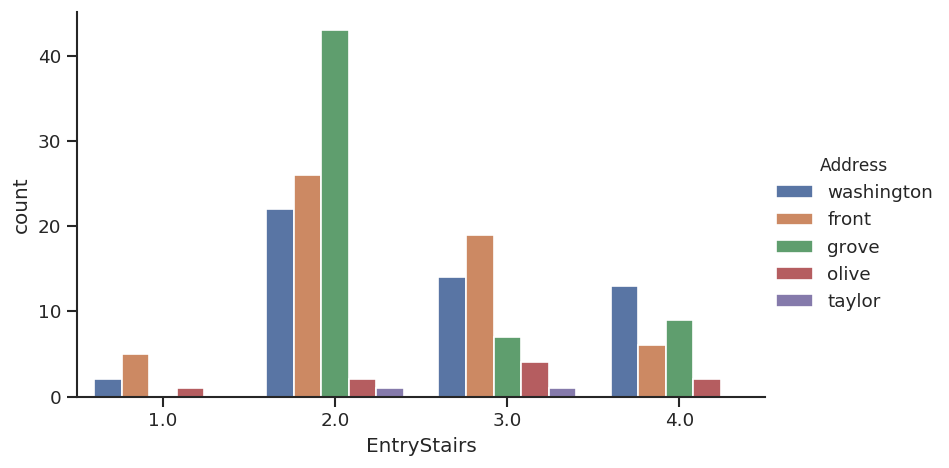

In [28]:
sns.catplot(x="EntryStairs", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="EntryStairs", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#Chimney



*   Chimneys in north are mostly in good or fair condition. Locust, Market, and Jefferson have no excellent chimneys. 
*   Olive and taylor again have no excellent ratings here. 



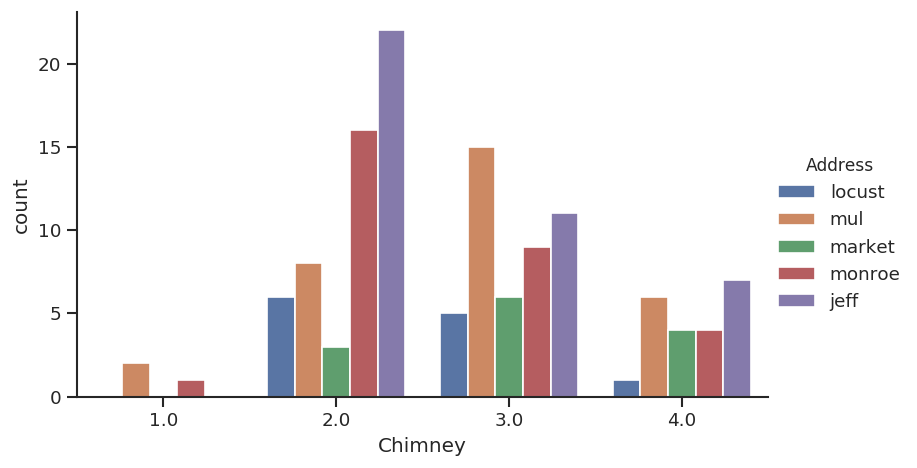

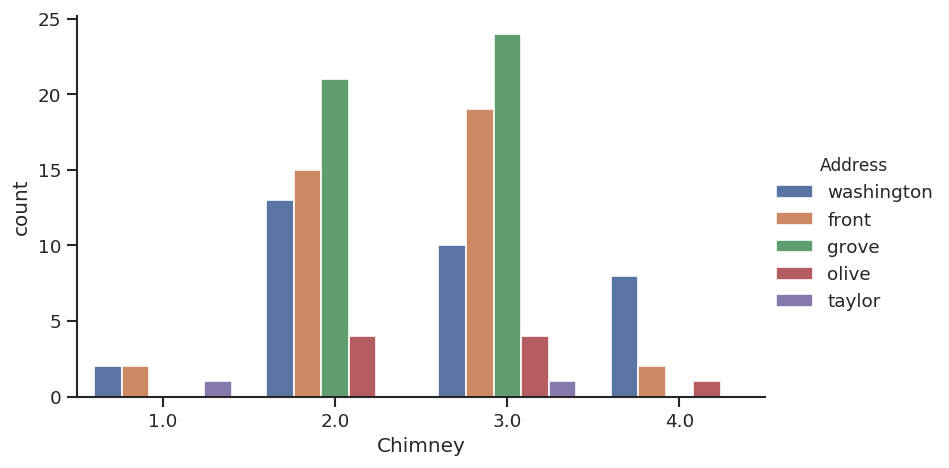

In [29]:
sns.catplot(x="Chimney", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Chimney", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#East and west side of west Bloomington

###West side properties are generally in worse condition.

In [0]:
frameEast = [morris, howard, allin, low]
resultEast = pd.concat(frameEast)

frameWest = [mason, oak, lee]
resultWest = pd.concat(frameWest)

In [0]:
resultEW = [resultEast, resultWest]
finalEW = pd.concat(resultEW)

##Roof

*   Howard and Low streets have no roof in excellent condition. 
*   These streets have houses scored pretty evenly between 2 (good), 3 (fair), and 4 (poor).
*   Interestingly, oak street has no properties with a fair or poor roof. 



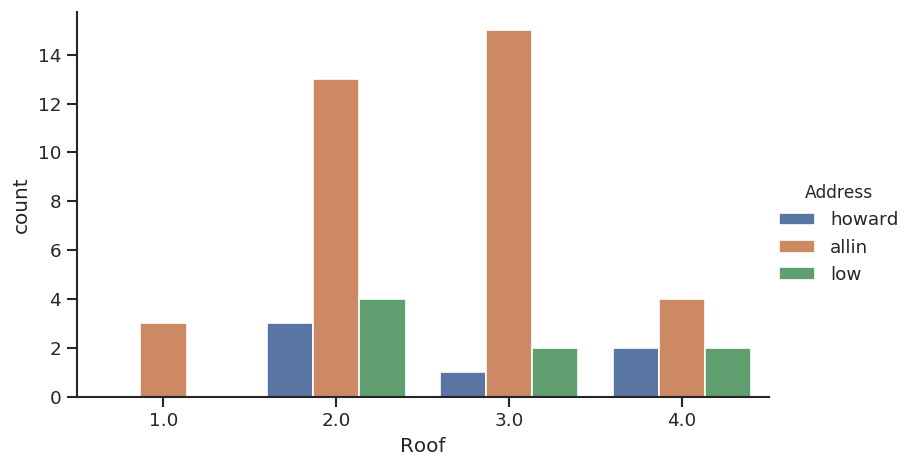

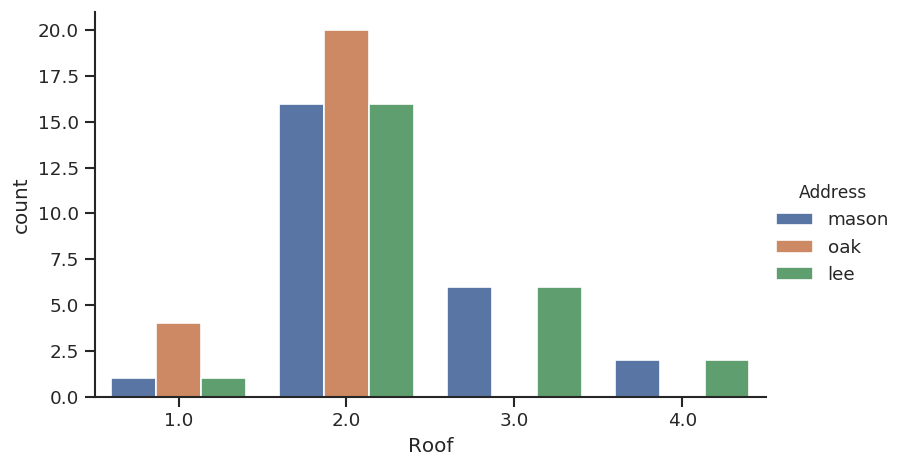

In [32]:
n = sns.catplot(x="Roof", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Roof", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Foundation

* East side propeties (Howard, Allin, and Low) have no property with an excellent foundation. 
* Low street has an even distribution of scores between goof, fair and poor property foundations. 

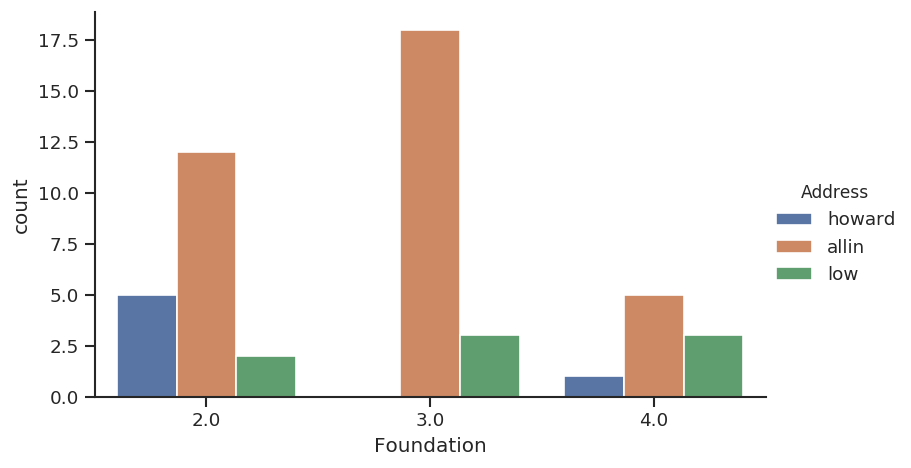

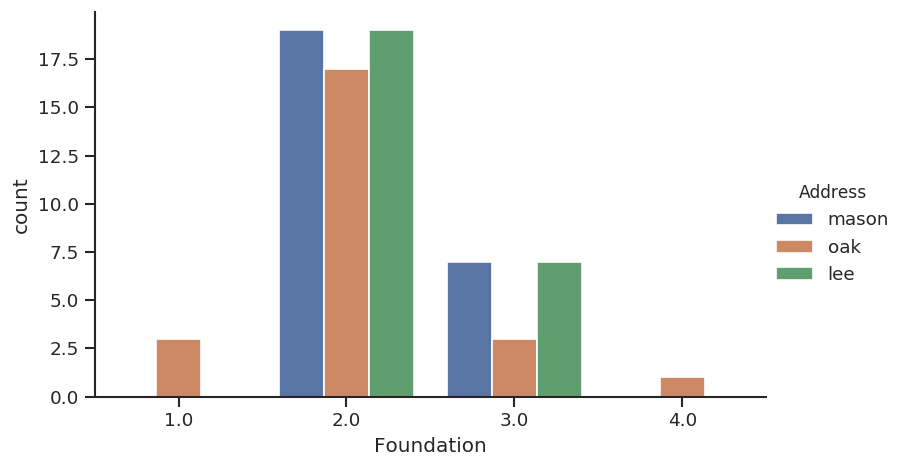

In [0]:

n = sns.catplot(x="Foundation", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Foundation", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Windows

*   Howard, Mason and Lee streets have no property with excellent window.
*   Oak street doesn't have a property with poor window. 



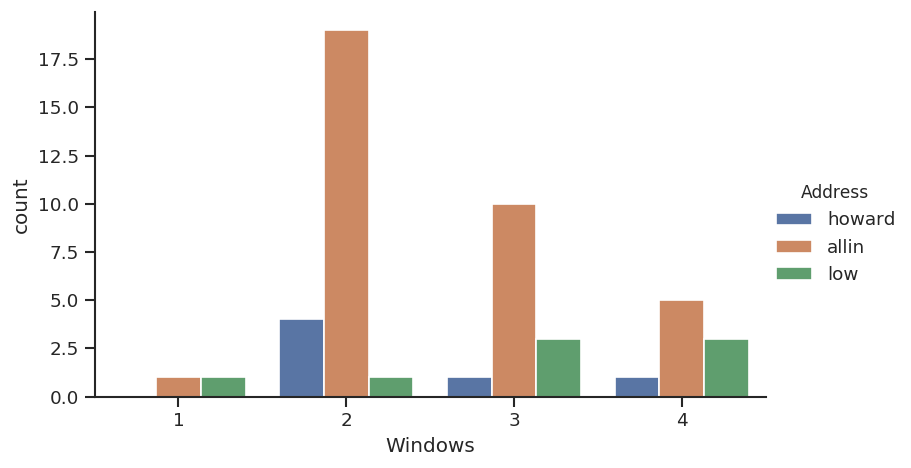

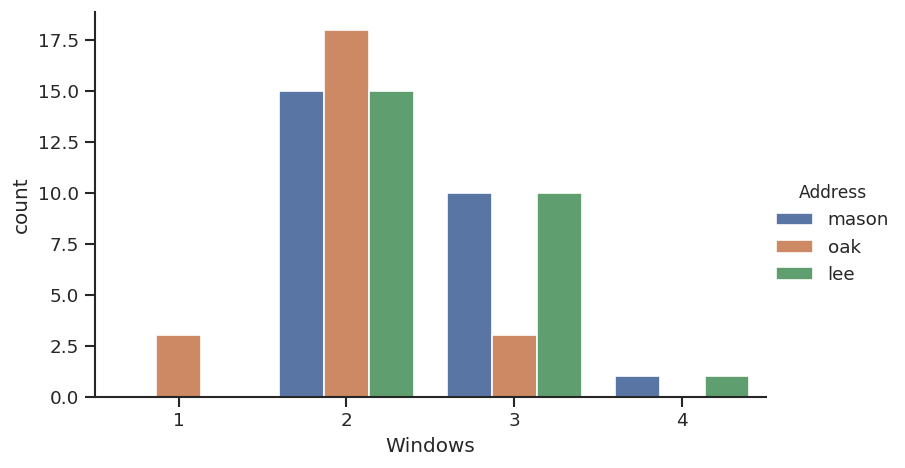

In [0]:
n = sns.catplot(x="Windows", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Windows", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Siding



*   Howard, Mason, and Lee have no property with excellent siding. 
*   West-side properties also don't have any property with poor siding. 



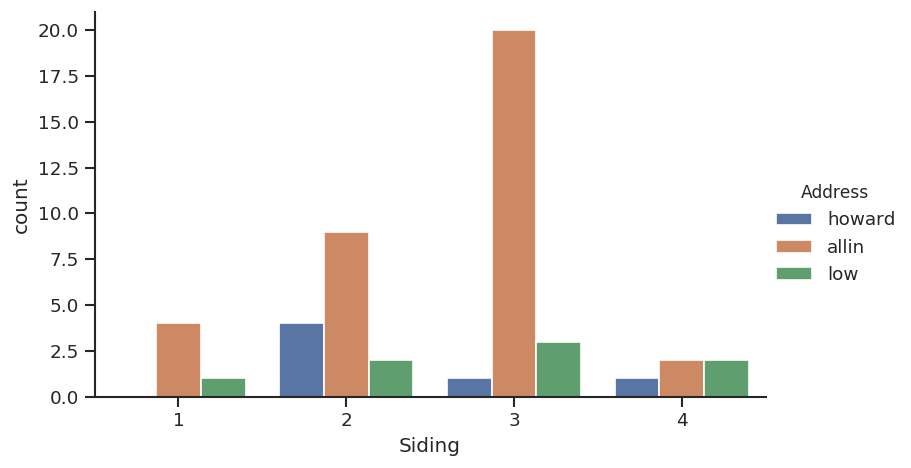

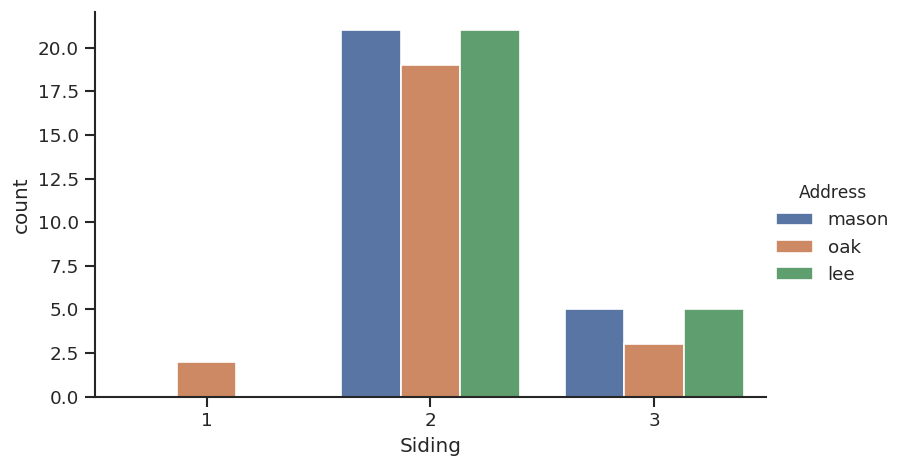

In [0]:
n = sns.catplot(x="Siding", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Siding", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Gutter



*   Gutters see the highest score of 4 amongst all other properties. 
*   There are no poor gutters on the west side. 



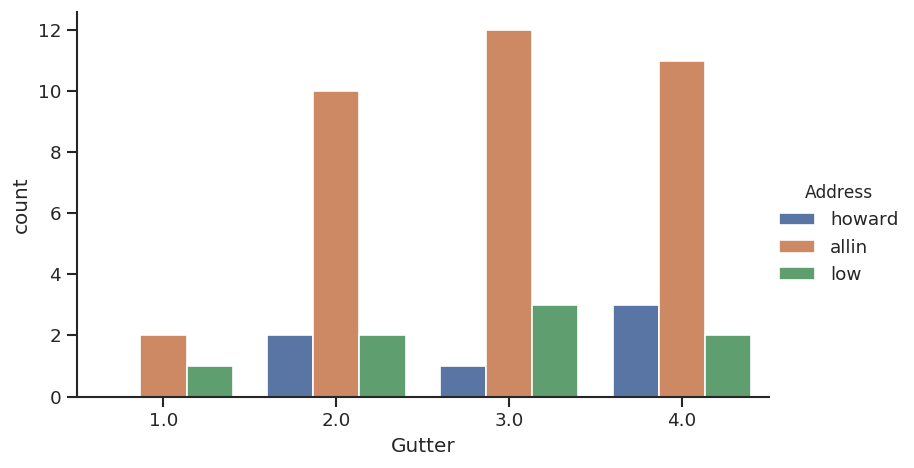

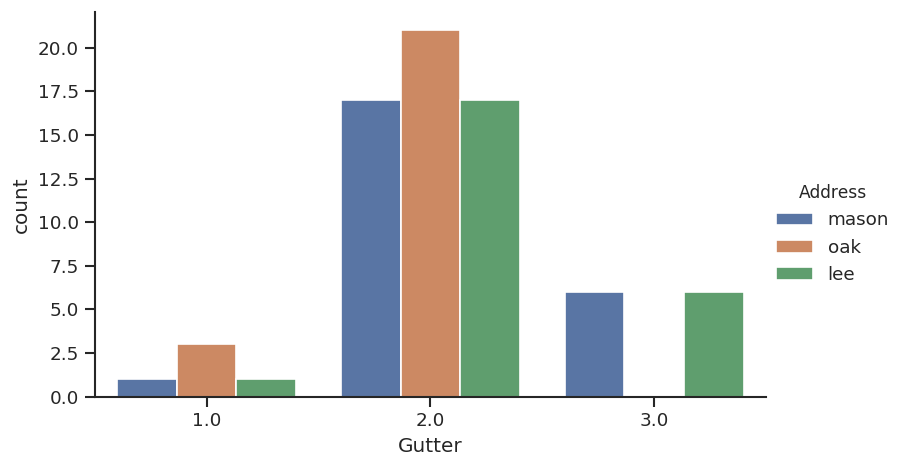

In [33]:
sns.catplot(x="Gutter", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Gutter", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Sidewalk



*   Allin has more scores with poor sidewalk than any other component we've seen so far. Howard and low have no excellent sidewalks. 
*   Similarly, Mason and Lee have no excellent sidewalks. 



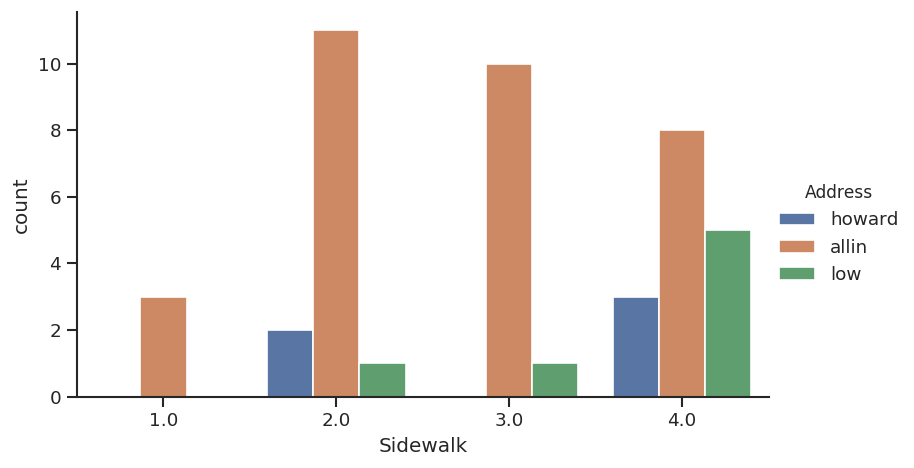

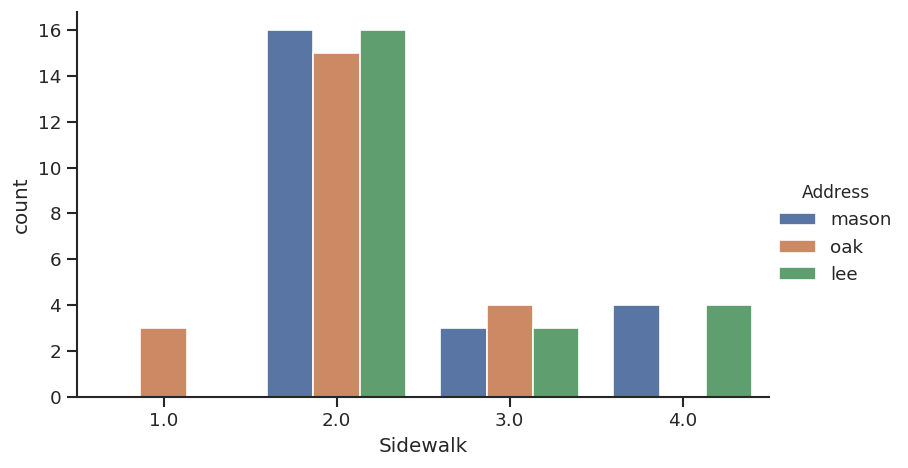

In [34]:
sns.catplot(x="Sidewalk", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Sidewalk", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Public Sidewalk



*   Few properties for howard and low. 
*   Public sidewalks are generally in a good condition, but from the charts we can see that no public sidewalk in the west has any poor rating. 



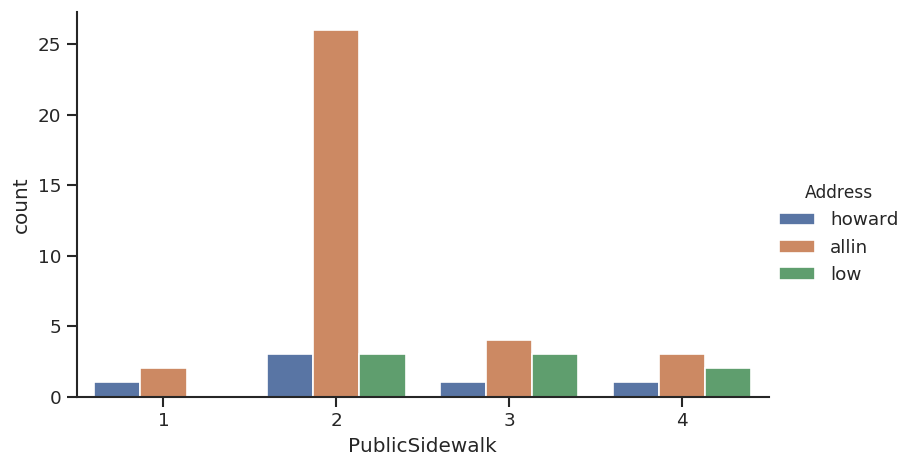

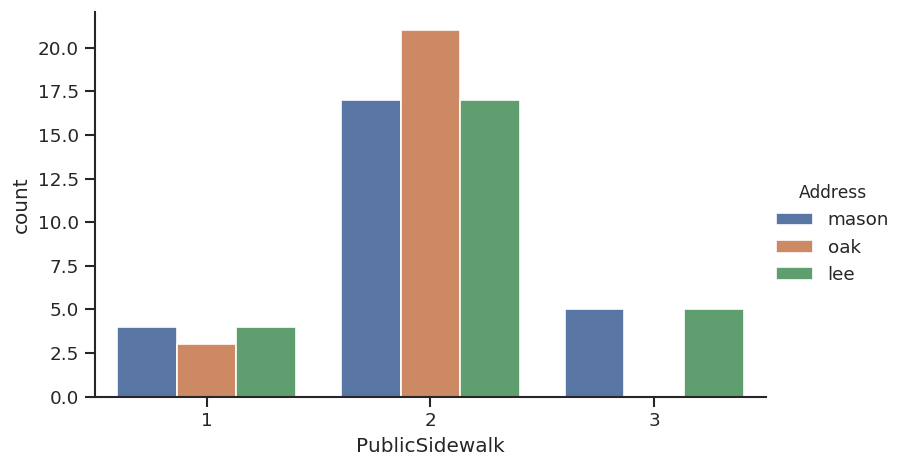

In [35]:
sns.catplot(x="PublicSidewalk", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="PublicSidewalk", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Driveway



*   East side properties have no excellent driveway at all. Here we only have 4 ratings for howard, with 2 scored each good and poor. 
*   Comparatively, west side has 3 excellent driveways and only 1 poor.



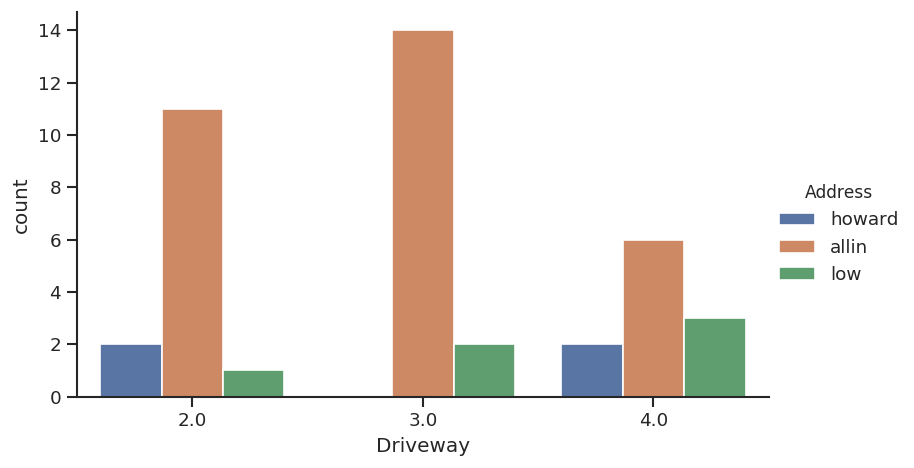

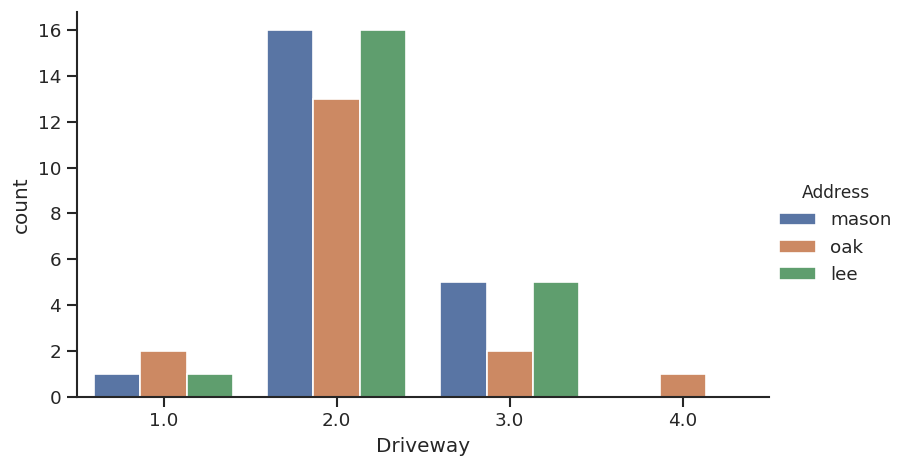

In [36]:
sns.catplot(x="Driveway", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Driveway", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Screens



*   Screens in east have more scores on the lower end, except for Howard, which has pretty evenly distributed scores.
*   On the west side, we see the pattern most common in the overall structures i.e. most properties being rated good, then fair, poor and the least number is excellent. 



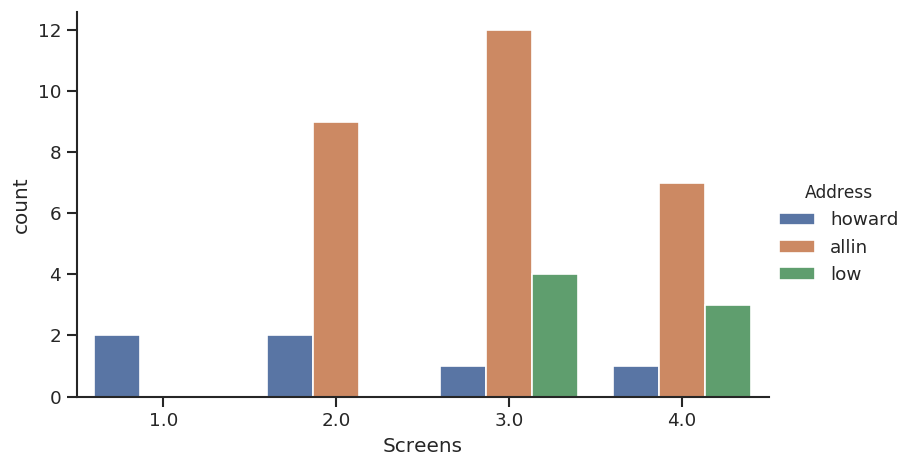

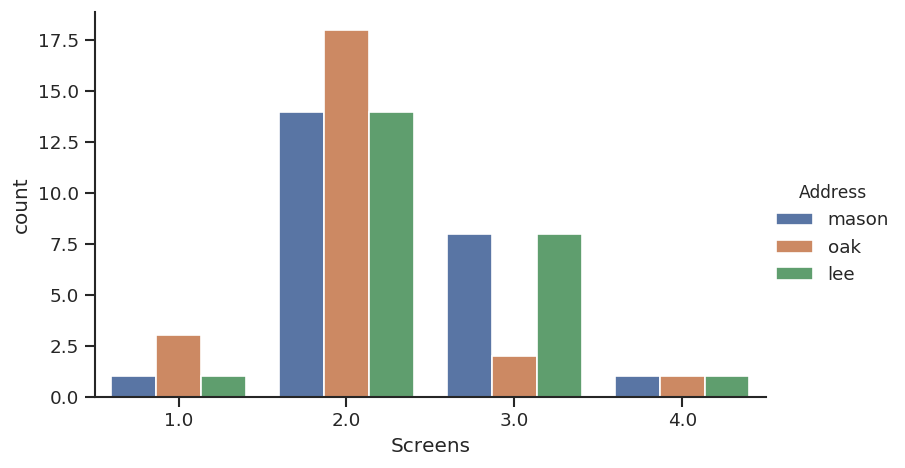

In [37]:
sns.catplot(x="Screens", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Screens", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Porch



*   East side has 2 excellent porches while west has 3. Allin has most properties rated fair.
*   No poor porch on the west side. 



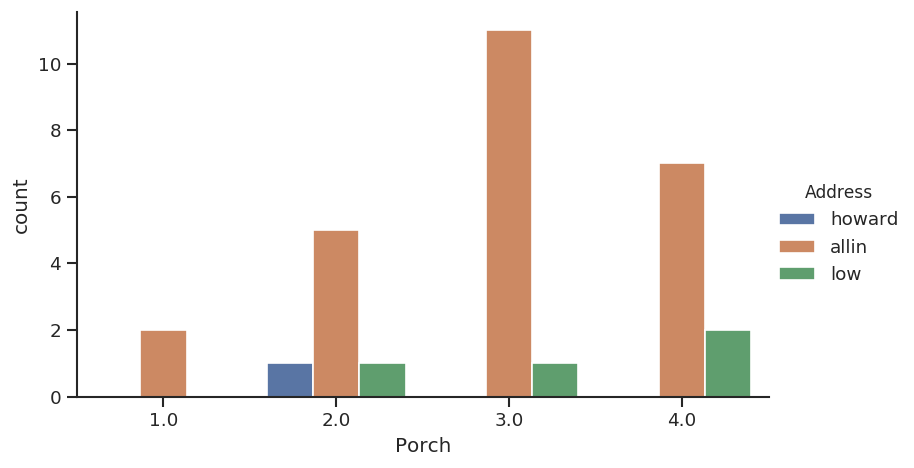

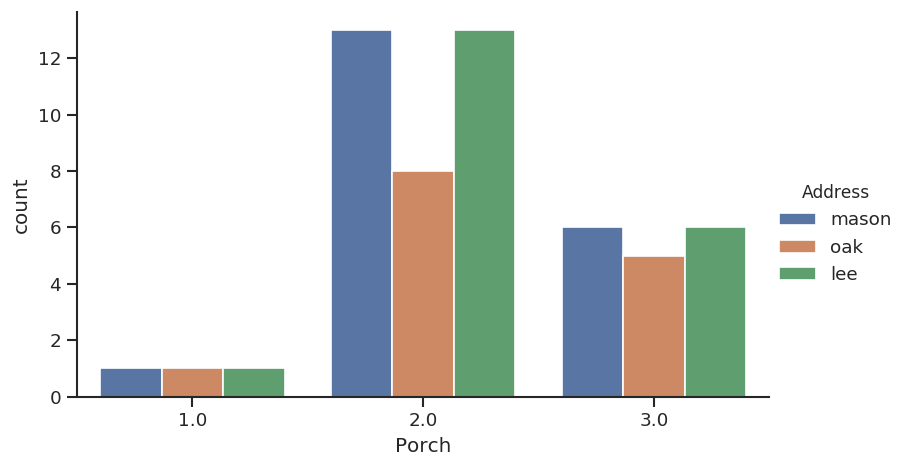

In [38]:
sns.catplot(x="Porch", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Porch", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Entry Stairs



*   Entry Stairs in east have more poor ratings than in west. 
*   Low street has the worst entry stairs. 



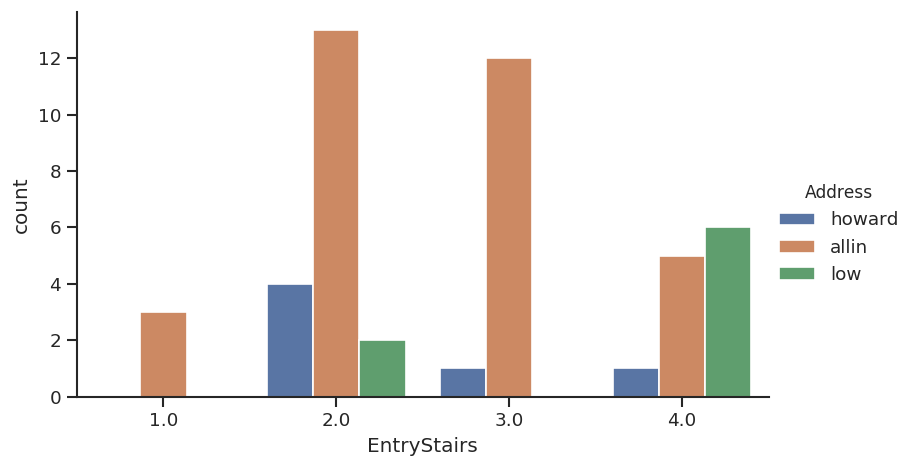

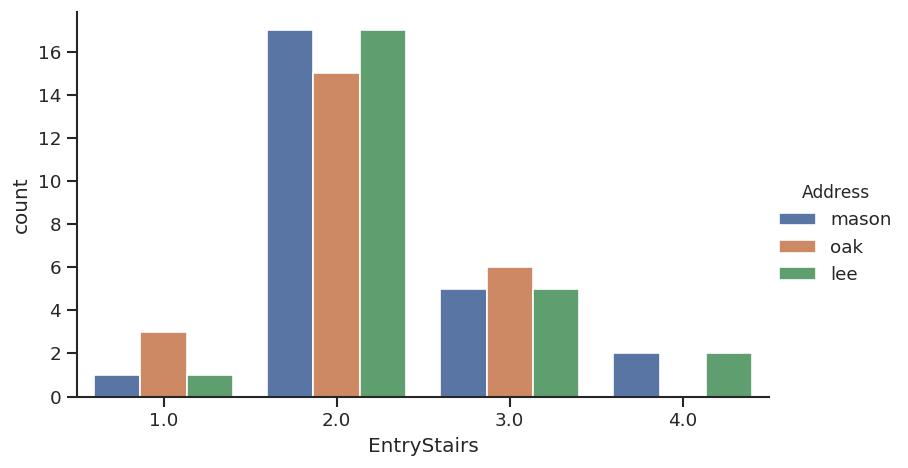

In [39]:
sns.catplot(x="EntryStairs", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="EntryStairs", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#Chimney



*   There are no excellent chimneys on the east side and no poor chimneys on the west side. 
*   Mason and Lee have no excellent chimneys. 



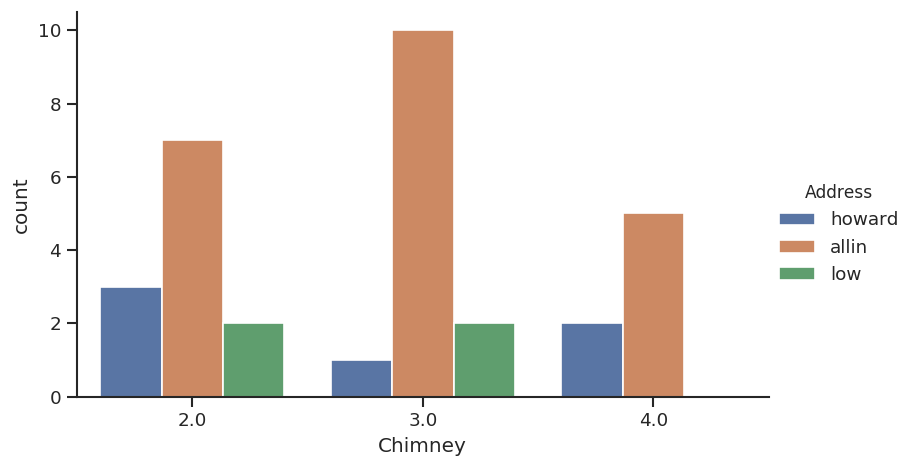

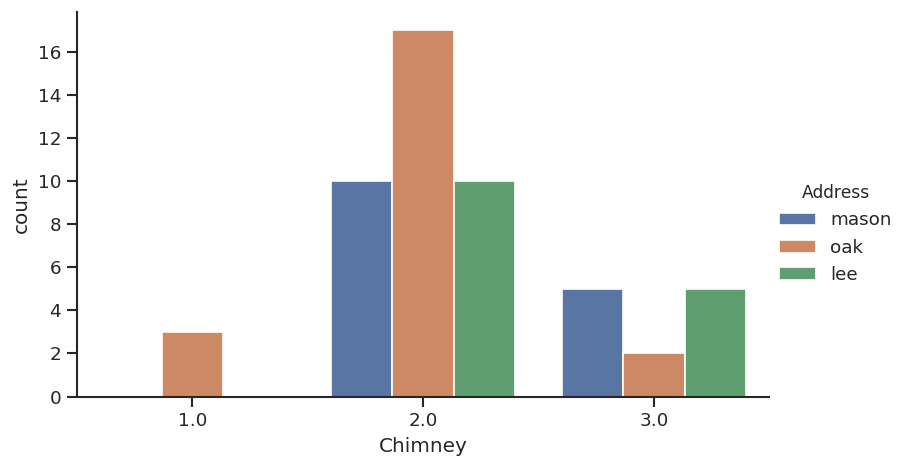

In [40]:
sns.catplot(x="Chimney", hue="Address",
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Chimney", hue="Address",
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


#**Conclusion**



*   The north side properties are doing better than south. Properties in West side of West Bloomington are generally better than the East side. 
*   As we go more west, we see properties in better condition. 
*   There is no one part of the property that has the lowest/same score across the entire street
*   Windows and Screens ahve similar ratings. Similarly, entry stairs and porch have similar ratings. 


